<h1><center> BBM469 - Data Intensive Applications Labratory </center></h1>

<h2><center> Assignment - 2 </center></h2>

<h4><center>Clustering and Classification with Python</center></h4>

<b>Author:</b> Ali Baran Tasdemir - 21627653

In this assignment we try to apply methods like clustering and classification. This assignment aims to diagnosing breast cancer using the machine learning methods from the features gathered by images of the breast cells. The data labeled as M (malignant) or B (benign). 

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

<h3> Dataset First Look and Preprocess</h3>

Information of columns

- id: ID number

- diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)

- radius_mean: mean of distances from center to points on the perimeter

- texture_mean: standard deviation of gray-scale values

- perimeter_mean: mean size of the core tumor

- area_mean

- smoothness_mean: mean of local variation in radius lengths

- compactness_mean: mean of perimeter^2 / area - 1.0

- concavity_mean: mean of severity of concave portions of the contour

- concave points_mean: mean for number of concave portions of the contour

- symmetry_mean

- fractal_dimension_mean: mean for "coastline approximation" - 1

- radius_se: standard error for the mean of distances from center to points on the perimeter

- texture_se: standard error for standard deviation of gray-scale values

- perimeter_se

- area_se

- smoothness_se: standard error for local variation in radius lengths

- compactness_se: standard error for perimeter^2 / area - 1.0

- concavity_se: standard error for severity of concave portions of the contour

- concave points_se: standard error for number of concave portions of the contour

- symmetry_se

- fractal_dimension_se: standard error for "coastline approximation" - 1

- radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter

- texture_worst: "worst" or largest mean value for standard deviation of gray-scale values

- perimeter_worst

- area_worst

- smoothness_worst: "worst" or largest mean value for local variation in radius lengths

- compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0

- concavity_worst: "worst" or largest mean value for severity of concave portions of the contour

- concave points_worst: "worst" or largest mean value for number of concave portions of the contour

- symmetry_worst

- fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

In [0]:
df = pd.read_csv('Data/data.csv')
df.shape

(569, 33)

In [0]:
df.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

There are 33 columns (features) in the dataset. With the knowledge we get from column descriptions, "id" column has no meaning over objective. So, in total we have 32 columns. Only "diagnosis" column is a string. Other columns are numerical. 

"Diagnosis" column is the target value. It can be M (Malignant) or B (Benign). It is binary so we can encode this column as 1 (M) and 0 (B).

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

As we see below only a column named "Unnamed: 32" has 569 null values. This means all of the values are null so we can drop entire column.
Also "id" column has no meaning over the objective. So we can drop that column too.

In [0]:
# First of all we need to find that how many features is null
df.shape[0] - (df.shape[0] - df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [0]:
df = df.drop(['id', 'Unnamed: 32'],axis = 1)

In [0]:
df.head()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         M        17.99  ...          0.4601                  0.11890
1         M        20.57  ...          0.2750                  0.08902
2         M        19.69  ...          0.3613                  0.08758
3         M        11.42  ...          0.6638                  0.17300
4         M        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]

Target column (diagnosis) has two different values, B and M. So we will encode them as (B = 0) and (M = 1).

In [0]:
mask = {
    'B': 0,
    'M': 1
}
df['diagnosis'] = df['diagnosis'].map(mask)

Our dataset is clean and ready to use. We can save the clean dataset to create a checkpoint.

In [0]:
df.to_csv('Data/data_clean.csv')

### Normalized Dataset

We will create another dataset. The difference is, we will normalize the features on this dataset.

In [0]:
scaler = MinMaxScaler()

df_n = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_n.head()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0        1.0     0.521037  ...        0.598462                 0.418864
1        1.0     0.643144  ...        0.233590                 0.222878
2        1.0     0.601496  ...        0.403706                 0.213433
3        1.0     0.210090  ...        1.000000                 0.773711
4        1.0     0.629893  ...        0.157500                 0.142595

[5 rows x 31 columns]

### Exploratory Data Analysis (EDA)

We will check some features and try to understand dataset better.

We split the features and the target value. X for features, y for target value

In [0]:
y = df.diagnosis
X = df_n.drop(['diagnosis'],axis = 1 )

Firstly we will check how is our data distributed. <i>Remember B = 0, M = 1</i>

Most of the data belongs to benign cells.

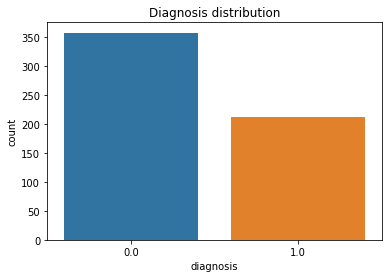

In [0]:
ax = sns.countplot(x='diagnosis', data=df_n)

plt.title("Diagnosis distribution")

plt.show()

In [0]:
df_n.describe()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  569.000000   569.000000  ...      569.000000               569.000000
mean     0.372583     0.338222  ...        0.263307                 0.189596
std      0.483918     0.166787  ...        0.121954                 0.118466
min      0.000000     0.000000  ...        0.000000                 0.000000
25%      0.000000     0.223342  ...        0.185098                 0.107700
50%      0.000000     0.302381  ...        0.247782                 0.163977
75%      1.000000     0.416442  ...        0.318155                 0.242949
max      1.000000     1.000000  ...        1.000000                 1.000000

[8 rows x 31 columns]

For an example, here we are inspecting first 15 features and the last 15 features. Here is a violin plot. That shows us malignant and benign cells has some distinctions. For our example, malignant cells has more bigger values for some of the features.

In [0]:
data_first = pd.concat([y,X.iloc[:,:15]],axis=1)
data_second = pd.concat([y,X.iloc[:,15:]],axis=1)

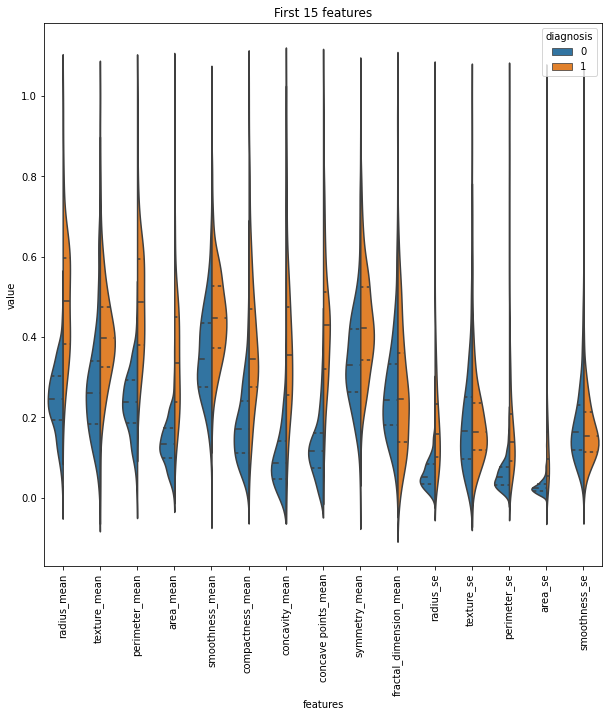

In [0]:
data = pd.melt(data_first,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("First 15 features")
plt.show()

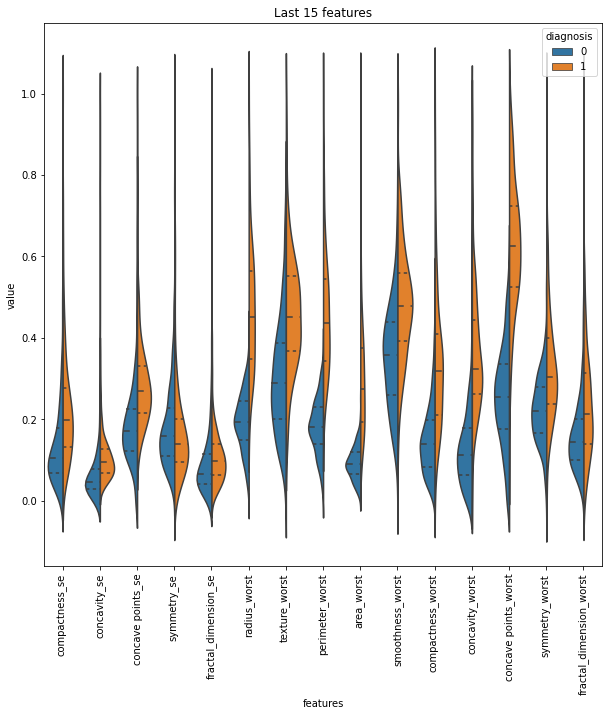

In [0]:
data = pd.melt(data_second,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
plt.title("Last 15 features")
plt.show()

Here is a correlation map that shows how our features correlated with each other. It has a range between -1 and 1. 
- Closer to 1 means, these features has positive correlation,
- 0 means there is no correlation,
- Closer to -1 means, these features has negative correlation

So we can say that features with closer to 1 or -1 has no importance. We can keep only one of them in the feature list.

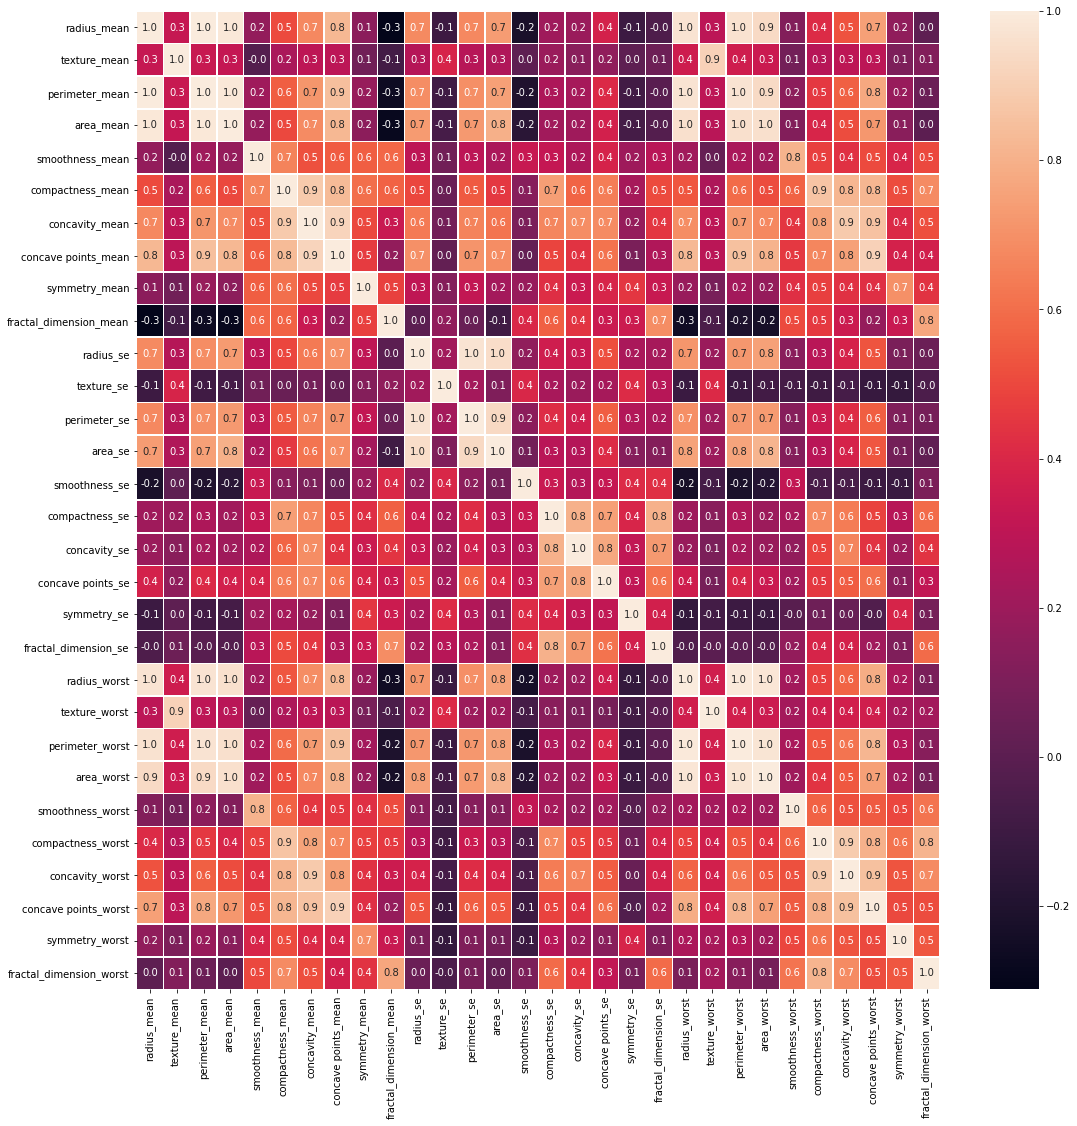

In [0]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In this step we can eliminate some features which are correlated with each other.

- In the bottom left of the correlation matrix, there is a 10x10 square. X axis is features with 'mean' and the y axis is features with 'worst'. If you look this square carefully, you can see there is a diagonal (top-left to bottom-right) with 1 correlation. This means features with 'mean' and 'worst' are positively correlated. So we may consider using only 1 of the features. (For example, check radius_mean and radius_worst)

- radius_mean, area_mean and perimeter_mean are correlated. I will use radius_mean.
- compactness_mean, concavity_mean, concave_points_mean are correlated. I will use compactnes_mean.
- radius_se, area_se and perimeter_se are correlated. I will use radius_se.

So our list of dropping features are:
```python
drop_list = ["radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst", "area_mean", "perimeter_mean", "concavity_mean", "concave points_mean", "area_se", "perimeter_se"]
```    

At last, after we decided the features we use we can create seperate target and features lists for algorithms. (y = Target, X = features)

In [0]:
drop_list = ["diagnosis", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", 
             "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", 
             "fractal_dimension_worst", "area_mean", "perimeter_mean", "concavity_mean", "concave points_mean", 
             "area_se", "perimeter_se"]

In [0]:
print("Normalized")
y_n_dropped = df_n.diagnosis
X_n_dropped = df_n.drop(drop_list,axis = 1)
print("Shape of y: ", y_n_dropped.shape)
print("Shape of X: ", X_n_dropped.shape)

# Without drop
print("Normalized without feature dropping.")
y_n = df_n.diagnosis
X_n = df_n.drop(['diagnosis'],axis = 1)
print("Shape of y: ", y_n.shape)
print("Shape of X: ", X_n.shape)
print()
print("Total {} features dropped.".format(X_n.shape[1]-X_n_dropped.shape[1]))

Normalized
Shape of y:  (569,)
Shape of X:  (569, 14)
Normalized without feature dropping.
Shape of y:  (569,)
Shape of X:  (569, 30)

Total 16 features dropped.


In [0]:
print("Remaining Features:")
print('\n'.join(X_dropped.columns))

Remaining Features:
radius_mean
texture_mean
smoothness_mean
compactness_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se


In [0]:
print("Not normalized")
y_dropped = df.diagnosis
X_dropped = df.drop(drop_list,axis = 1)
print("Shape of y: ", y_dropped.shape)
print("Shape of X: ", X_dropped.shape)

# Without drop
print("Normalized without feature dropping.")
y = df.diagnosis
X = df.drop(['diagnosis'],axis = 1)
print("Shape of y: ", y.shape)
print("Shape of X: ", X.shape)
print()
print("Total {} features dropped.".format(X.shape[1]-X_dropped.shape[1]))

Not normalized
Shape of y:  (569,)
Shape of X:  (569, 14)
Normalized without feature dropping.
Shape of y:  (569,)
Shape of X:  (569, 30)

Total 16 features dropped.


To not lose path into variable names and methods;

- **X, y :** Not normalized, full features
- **X_dropped, y_dropped :** Not normalized, only 14 features


- **X_n, y_n :** Normalized, full features
- **X_n_dropped, y_n_dropped :** Normalized, only 14 features

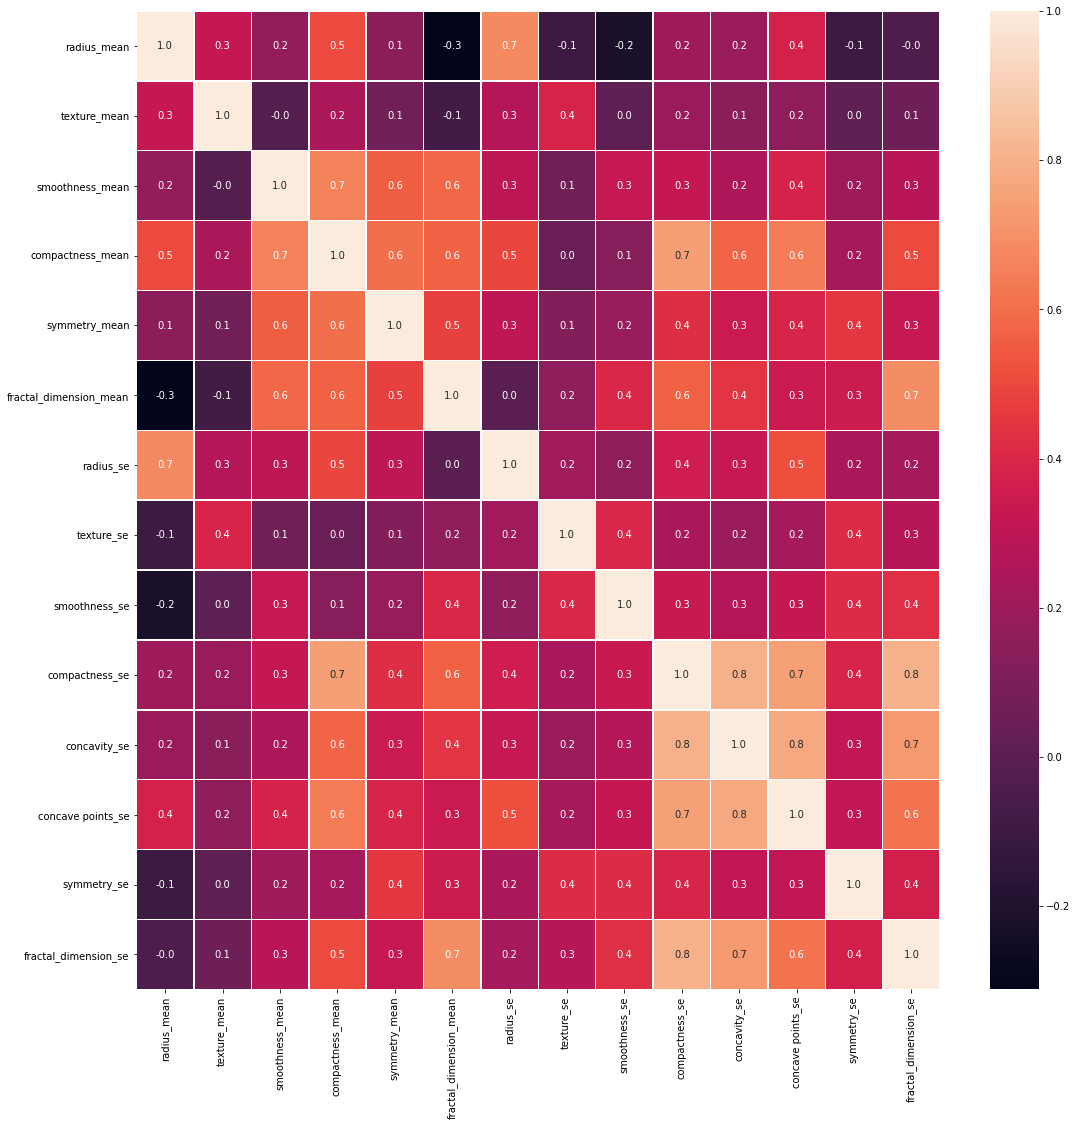

In [0]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_n_dropped.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<h3> Part - 1 Clustering</h3>

<p>
    In this part, we will use clustering methods (Kmeans, Kmedoids, etc.).
</p>

In [0]:
from sklearn.cluster import KMeans

##### Clustering with original dataset (not normalized)

In [0]:
kmeans_full = KMeans(n_clusters=2).fit(X)
clusters_full = kmeans_full.predict(X)

In [0]:
kmeans_dropped = KMeans(n_clusters=2).fit(X_dropped)
clusters_dropped = kmeans_dropped.predict(X_dropped)

In [0]:
kmeans_norm = KMeans(n_clusters=2).fit(X_n)
clusters_norm = kmeans_norm.predict(X_n)

In [0]:
kmeans_norm_dropped = KMeans(n_clusters=2).fit(X_n_dropped)
clusters_norm_dropped = kmeans_norm_dropped.predict(X_n_dropped)

In [0]:
cls_full = pd.concat((X, pd.Series(clusters_full, name="cluster")), axis=1)
cls_drop = pd.concat((X_dropped, pd.Series(clusters_dropped, name="cluster")), axis=1)
cls_norm_full = pd.concat((X_n, pd.Series(clusters_norm, name="cluster")), axis=1)
cls_norm_drop = pd.concat((X_n_dropped, pd.Series(clusters_norm_dropped, name="cluster")), axis=1)

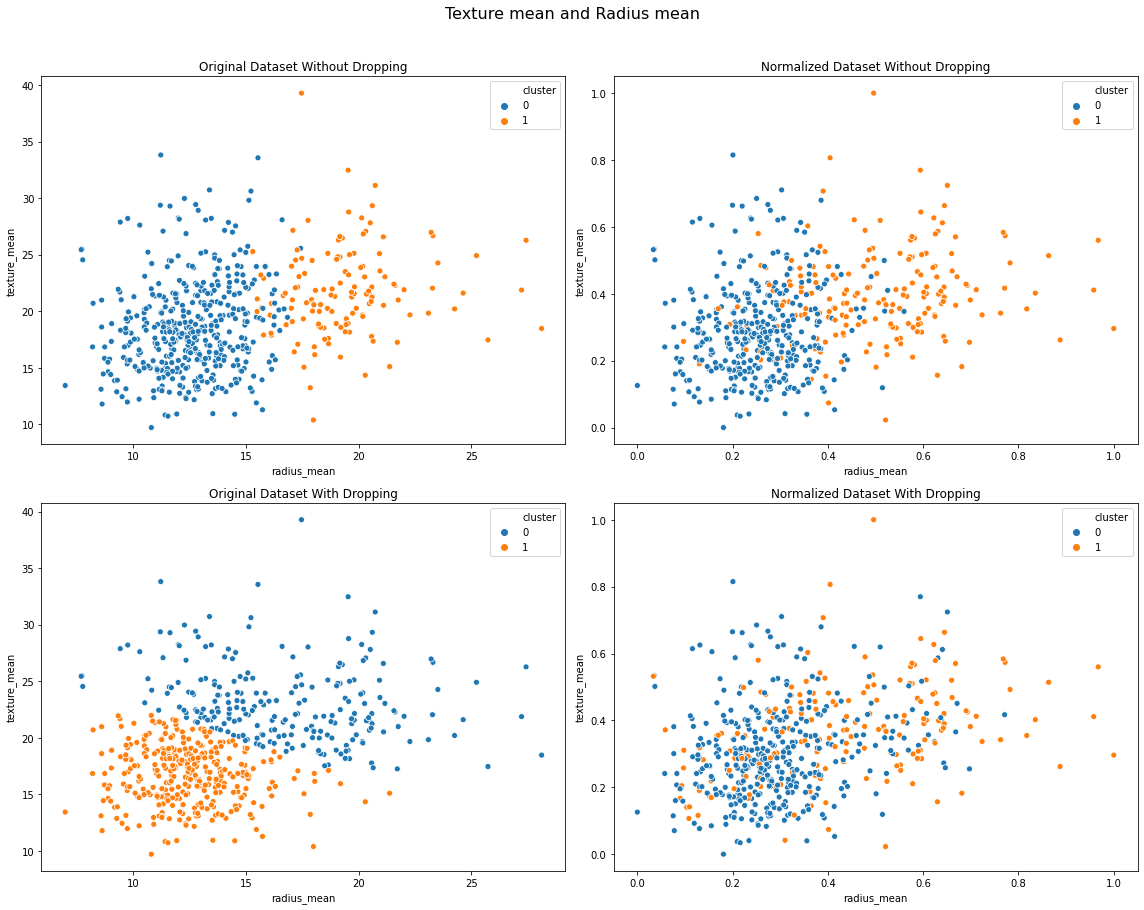

In [0]:
plt.figure(figsize = (16, 12))
plt.suptitle("Texture mean and Radius mean", fontsize=16, y=1.05)
ax = plt.subplot(221)
sns.scatterplot(data=cls_full, x='radius_mean', y='texture_mean', hue='cluster', ax=ax)
plt.title("Original Dataset Without Dropping")

ax = plt.subplot(222)
sns.scatterplot(data=cls_norm_full, x='radius_mean', y='texture_mean', hue='cluster', ax=ax)
plt.title("Normalized Dataset Without Dropping")

ax = plt.subplot(223)
sns.scatterplot(data=cls_drop, x='radius_mean', y='texture_mean', hue='cluster', ax=ax)
plt.title("Original Dataset With Dropping")

ax = plt.subplot(224)
sns.scatterplot(data=cls_norm_drop, x='radius_mean', y='texture_mean', hue='cluster', ax=ax)
plt.title("Normalized Dataset With Dropping")

plt.tight_layout()
plt.show()

As we know from EDA, texture mean and radius mean is higher on malignant cases. So the expected result is top right of the graph should be malignant and bottom-left of the graph should be benign. 

In overall results, normalized datase with dropping seems underperformed. Because we don't see any clear distinctions over clusters. But we can't say so much only by looking these plots. 

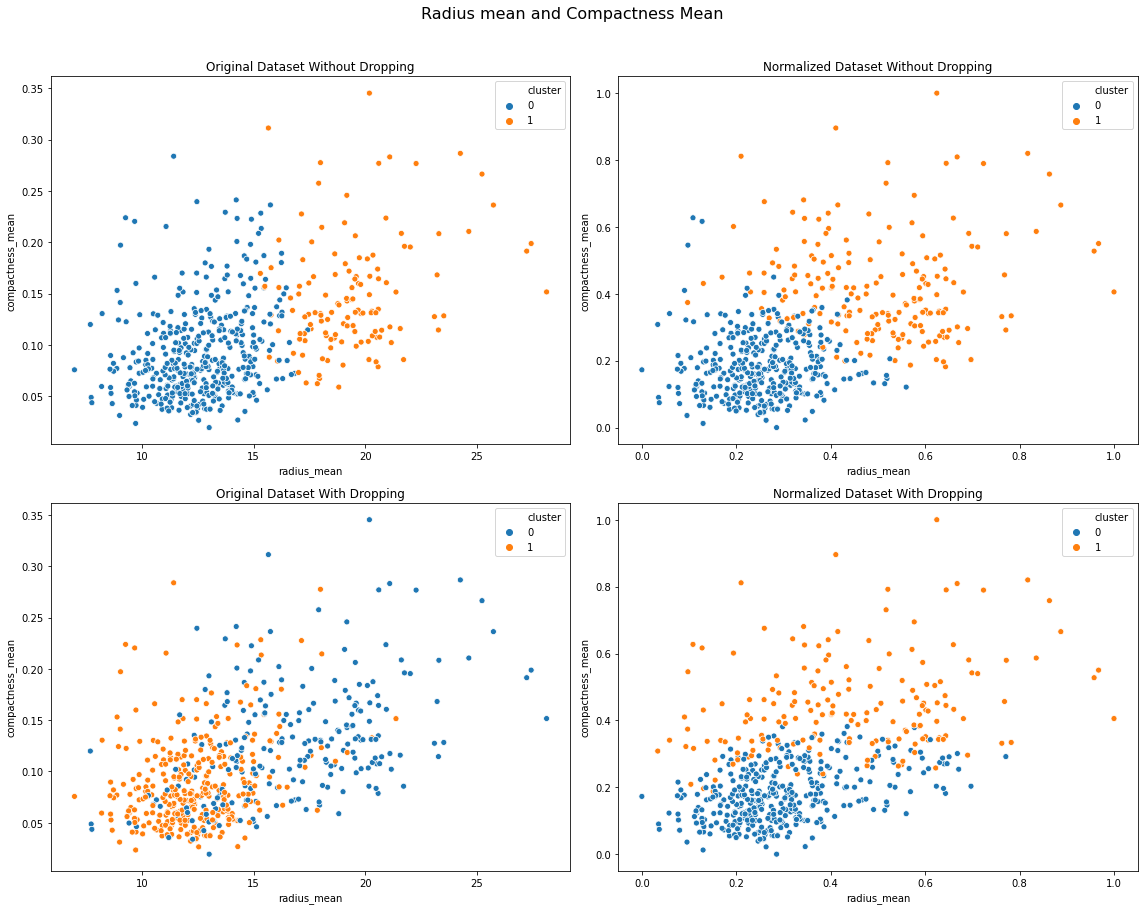

In [0]:
plt.figure(figsize = (16, 12))
plt.suptitle("Radius mean and Compactness Mean", fontsize=16, y=1.05)
ax = plt.subplot(221)
sns.scatterplot(data=cls_full, x='radius_mean', y='compactness_mean', hue='cluster', ax=ax)
plt.title("Original Dataset Without Dropping")

ax = plt.subplot(222)
sns.scatterplot(data=cls_norm_full, x='radius_mean', y='compactness_mean', hue='cluster', ax=ax)
plt.title("Normalized Dataset Without Dropping")

ax = plt.subplot(223)
sns.scatterplot(data=cls_drop, x='radius_mean', y='compactness_mean', hue='cluster', ax=ax)
plt.title("Original Dataset With Dropping")

ax = plt.subplot(224)
sns.scatterplot(data=cls_norm_drop, x='radius_mean', y='compactness_mean', hue='cluster', ax=ax)
plt.title("Normalized Dataset With Dropping")

plt.tight_layout()
plt.show()

**Overall look for Original Dataset**

Looks a little bit messy but good for overall looking over clusters generally.

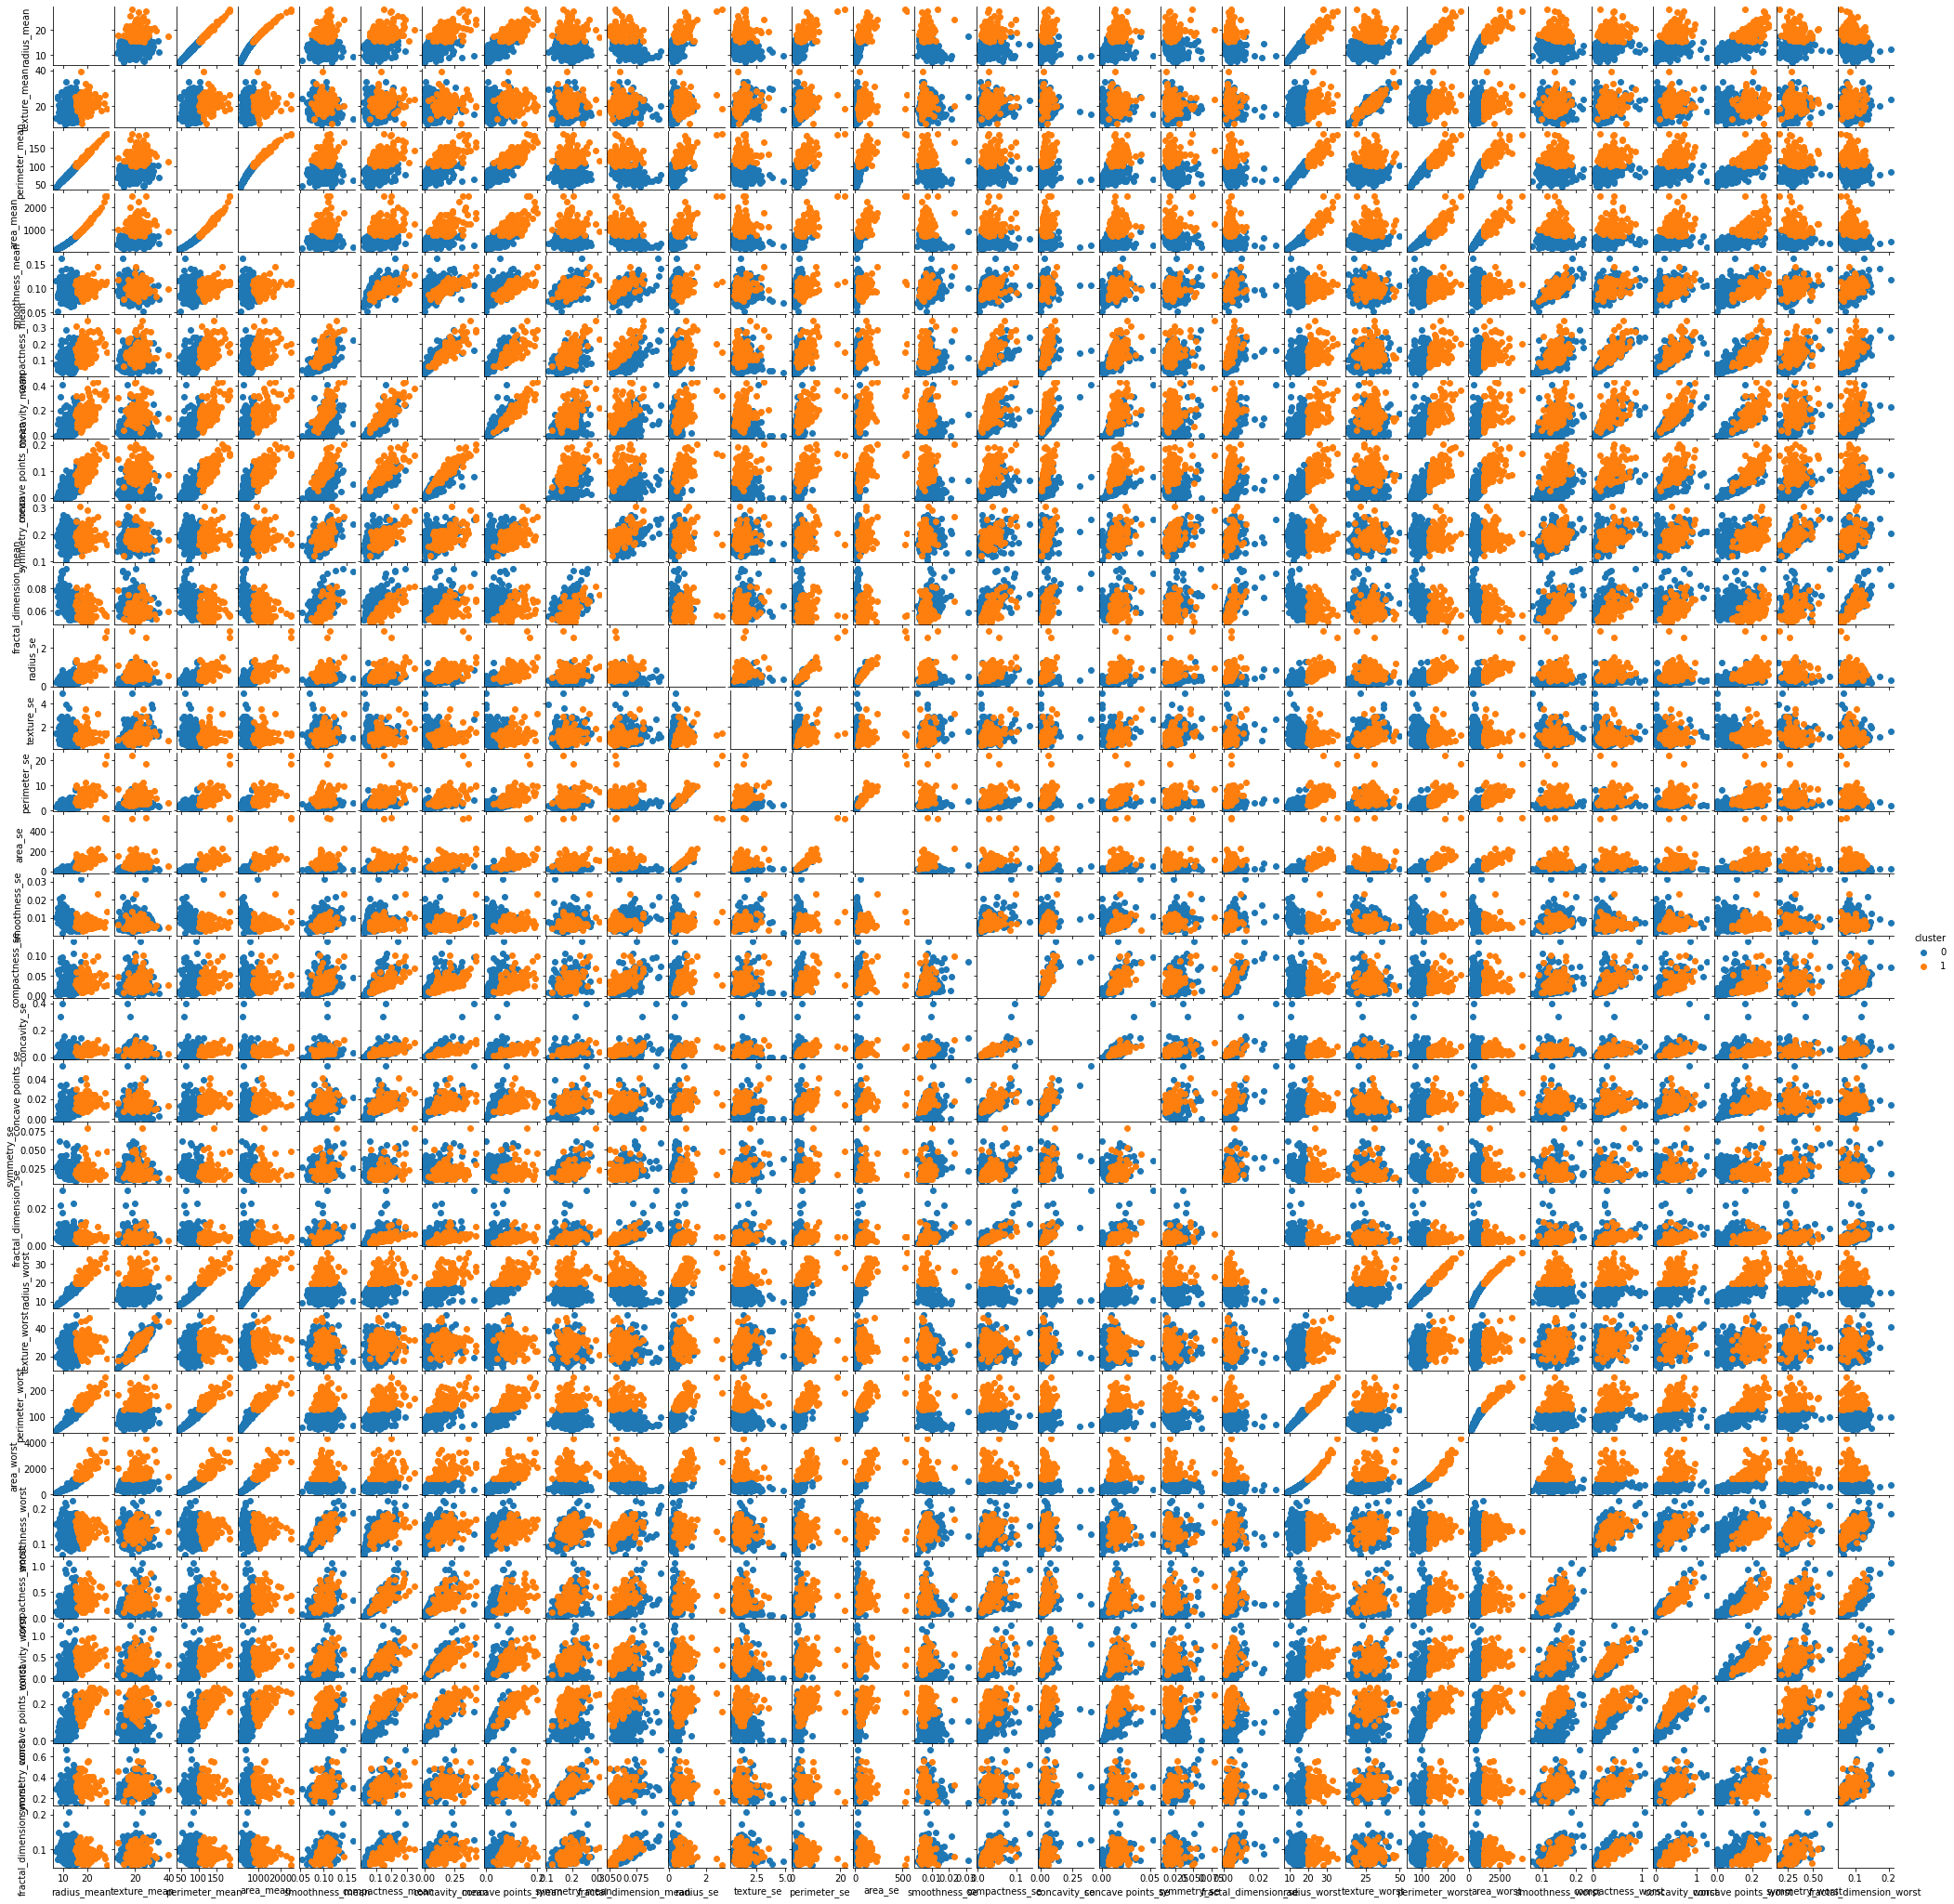

In [0]:
g = sns.PairGrid(cls_full, hue="cluster")
g.map_offdiag(plt.scatter)
g.fig.set_size_inches(28,28)
g.add_legend()
plt.show()

**Overall look for normalized dataset**

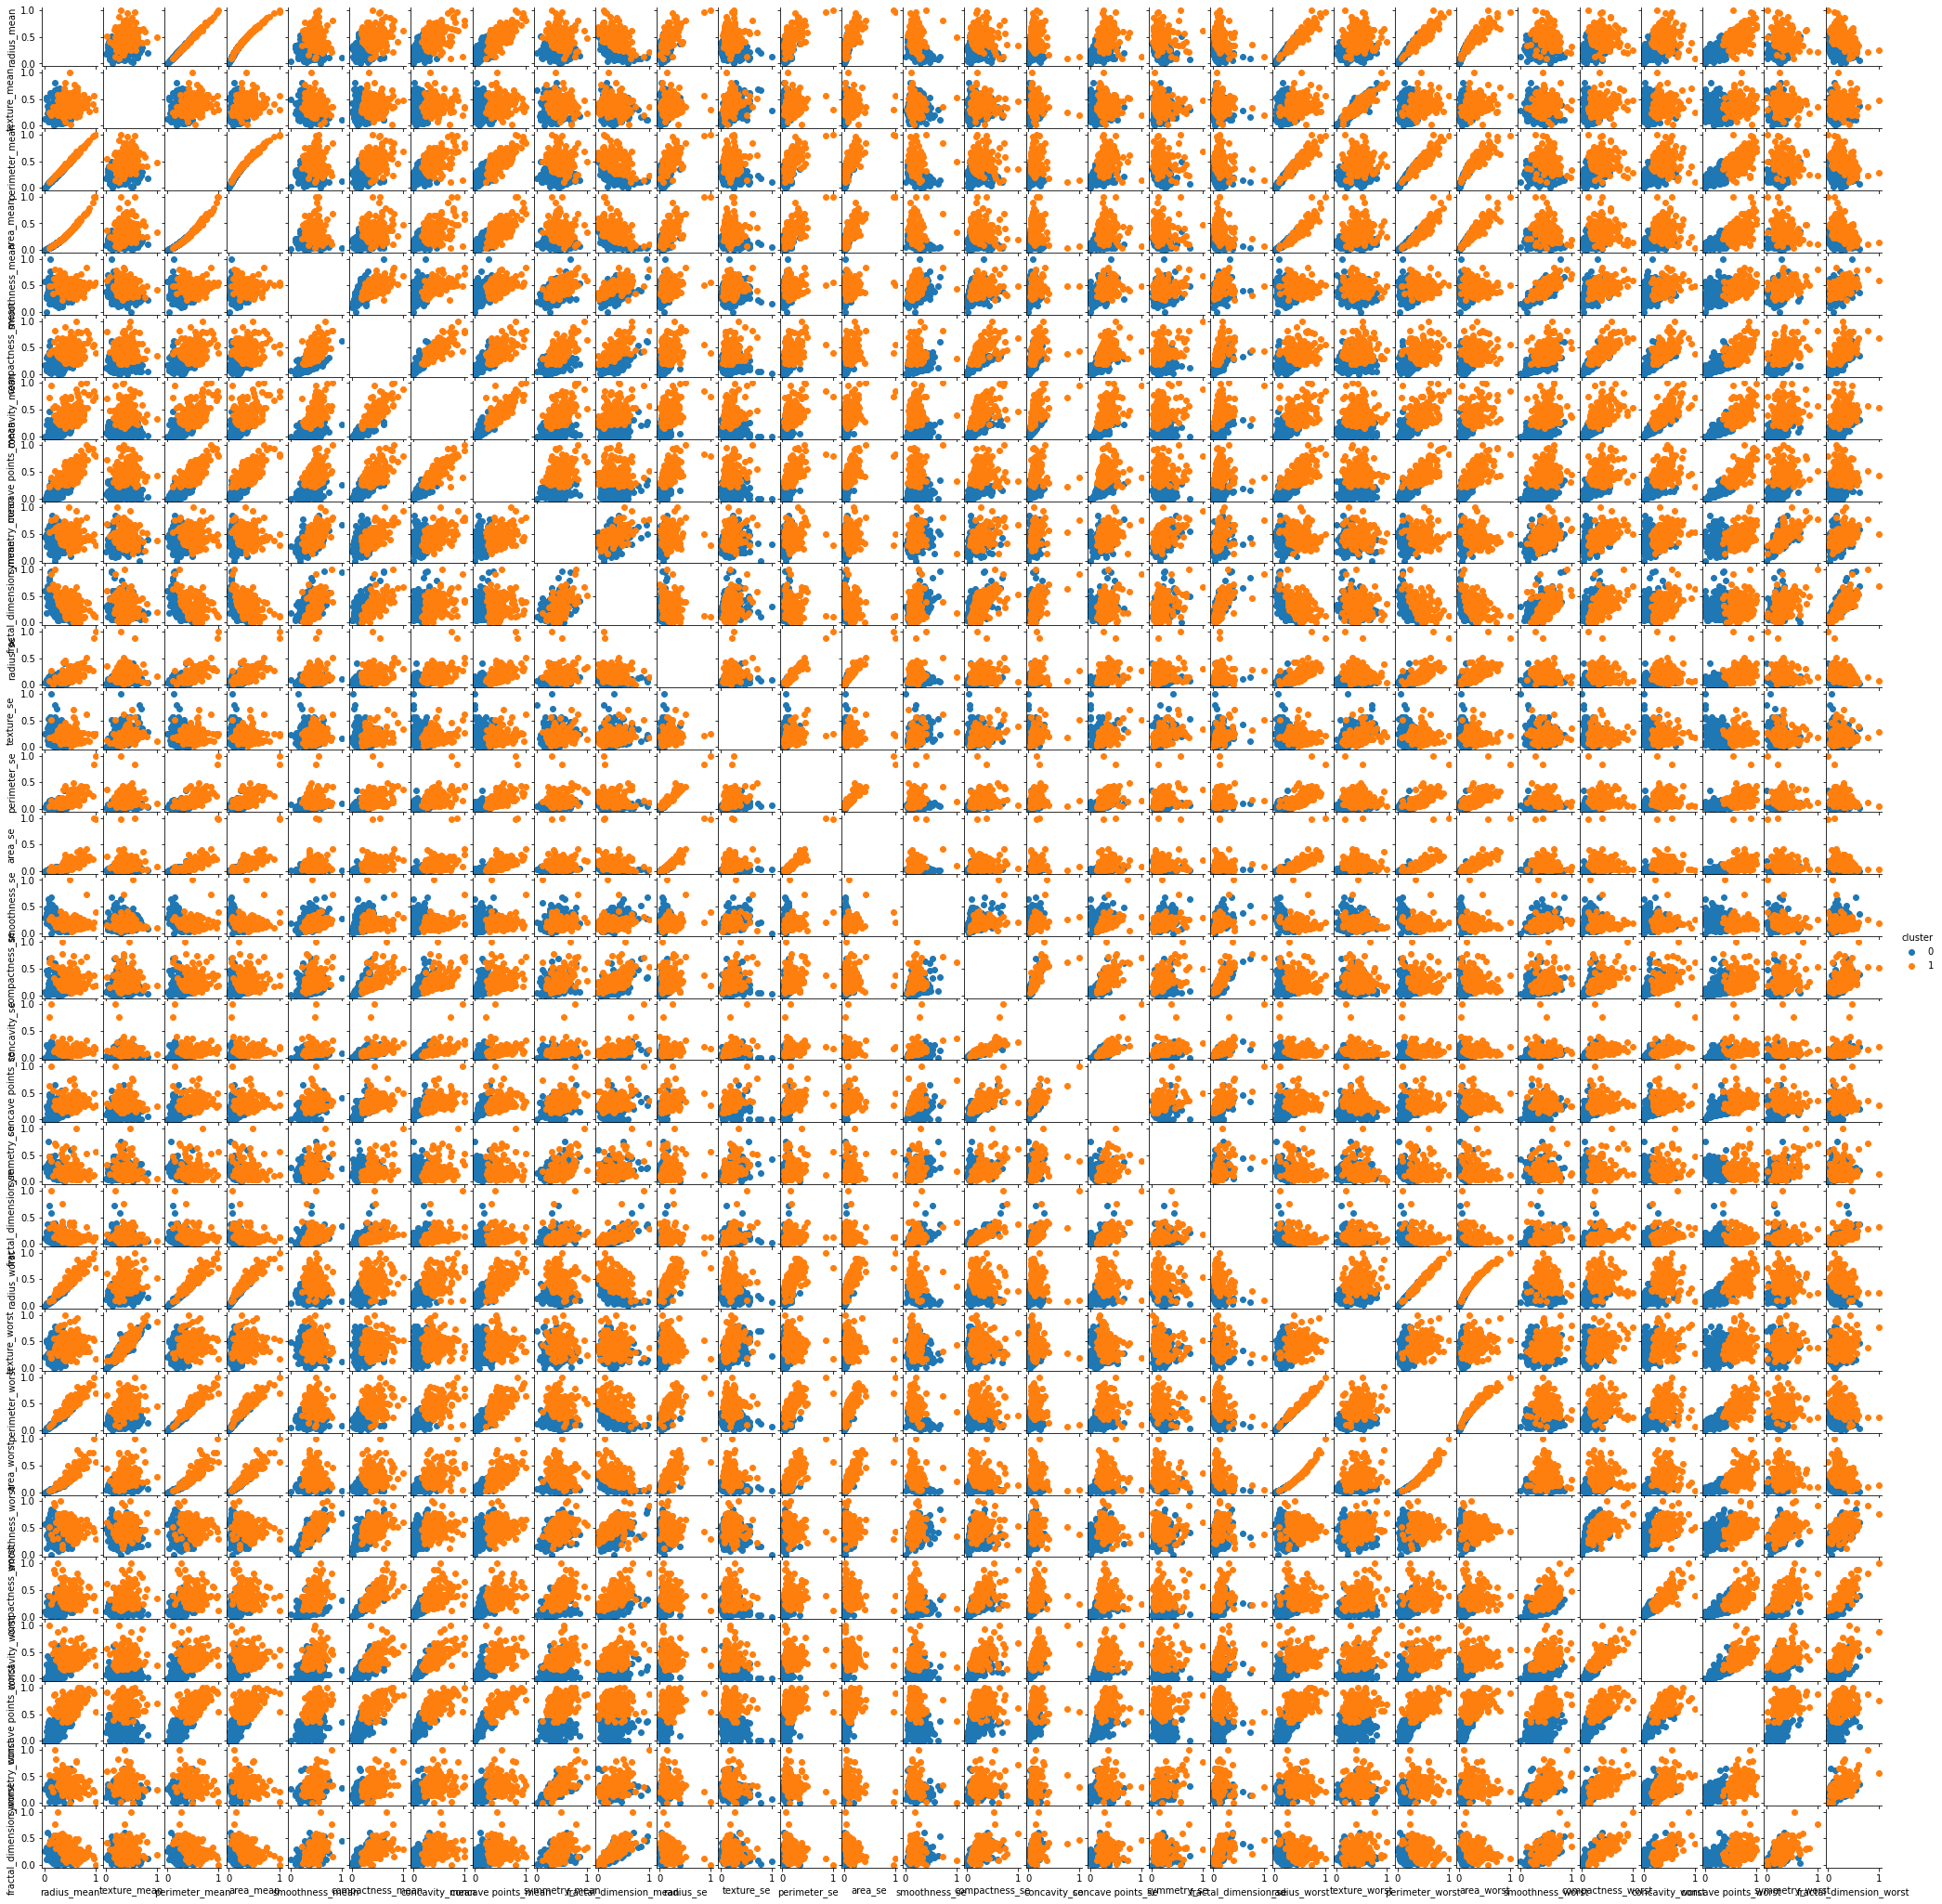

In [0]:
g = sns.PairGrid(cls_norm_full, hue="cluster")
g.map_offdiag(plt.scatter)
g.fig.set_size_inches(28,28)
g.add_legend()
plt.show()

**Overall look for original and dropped dataset**

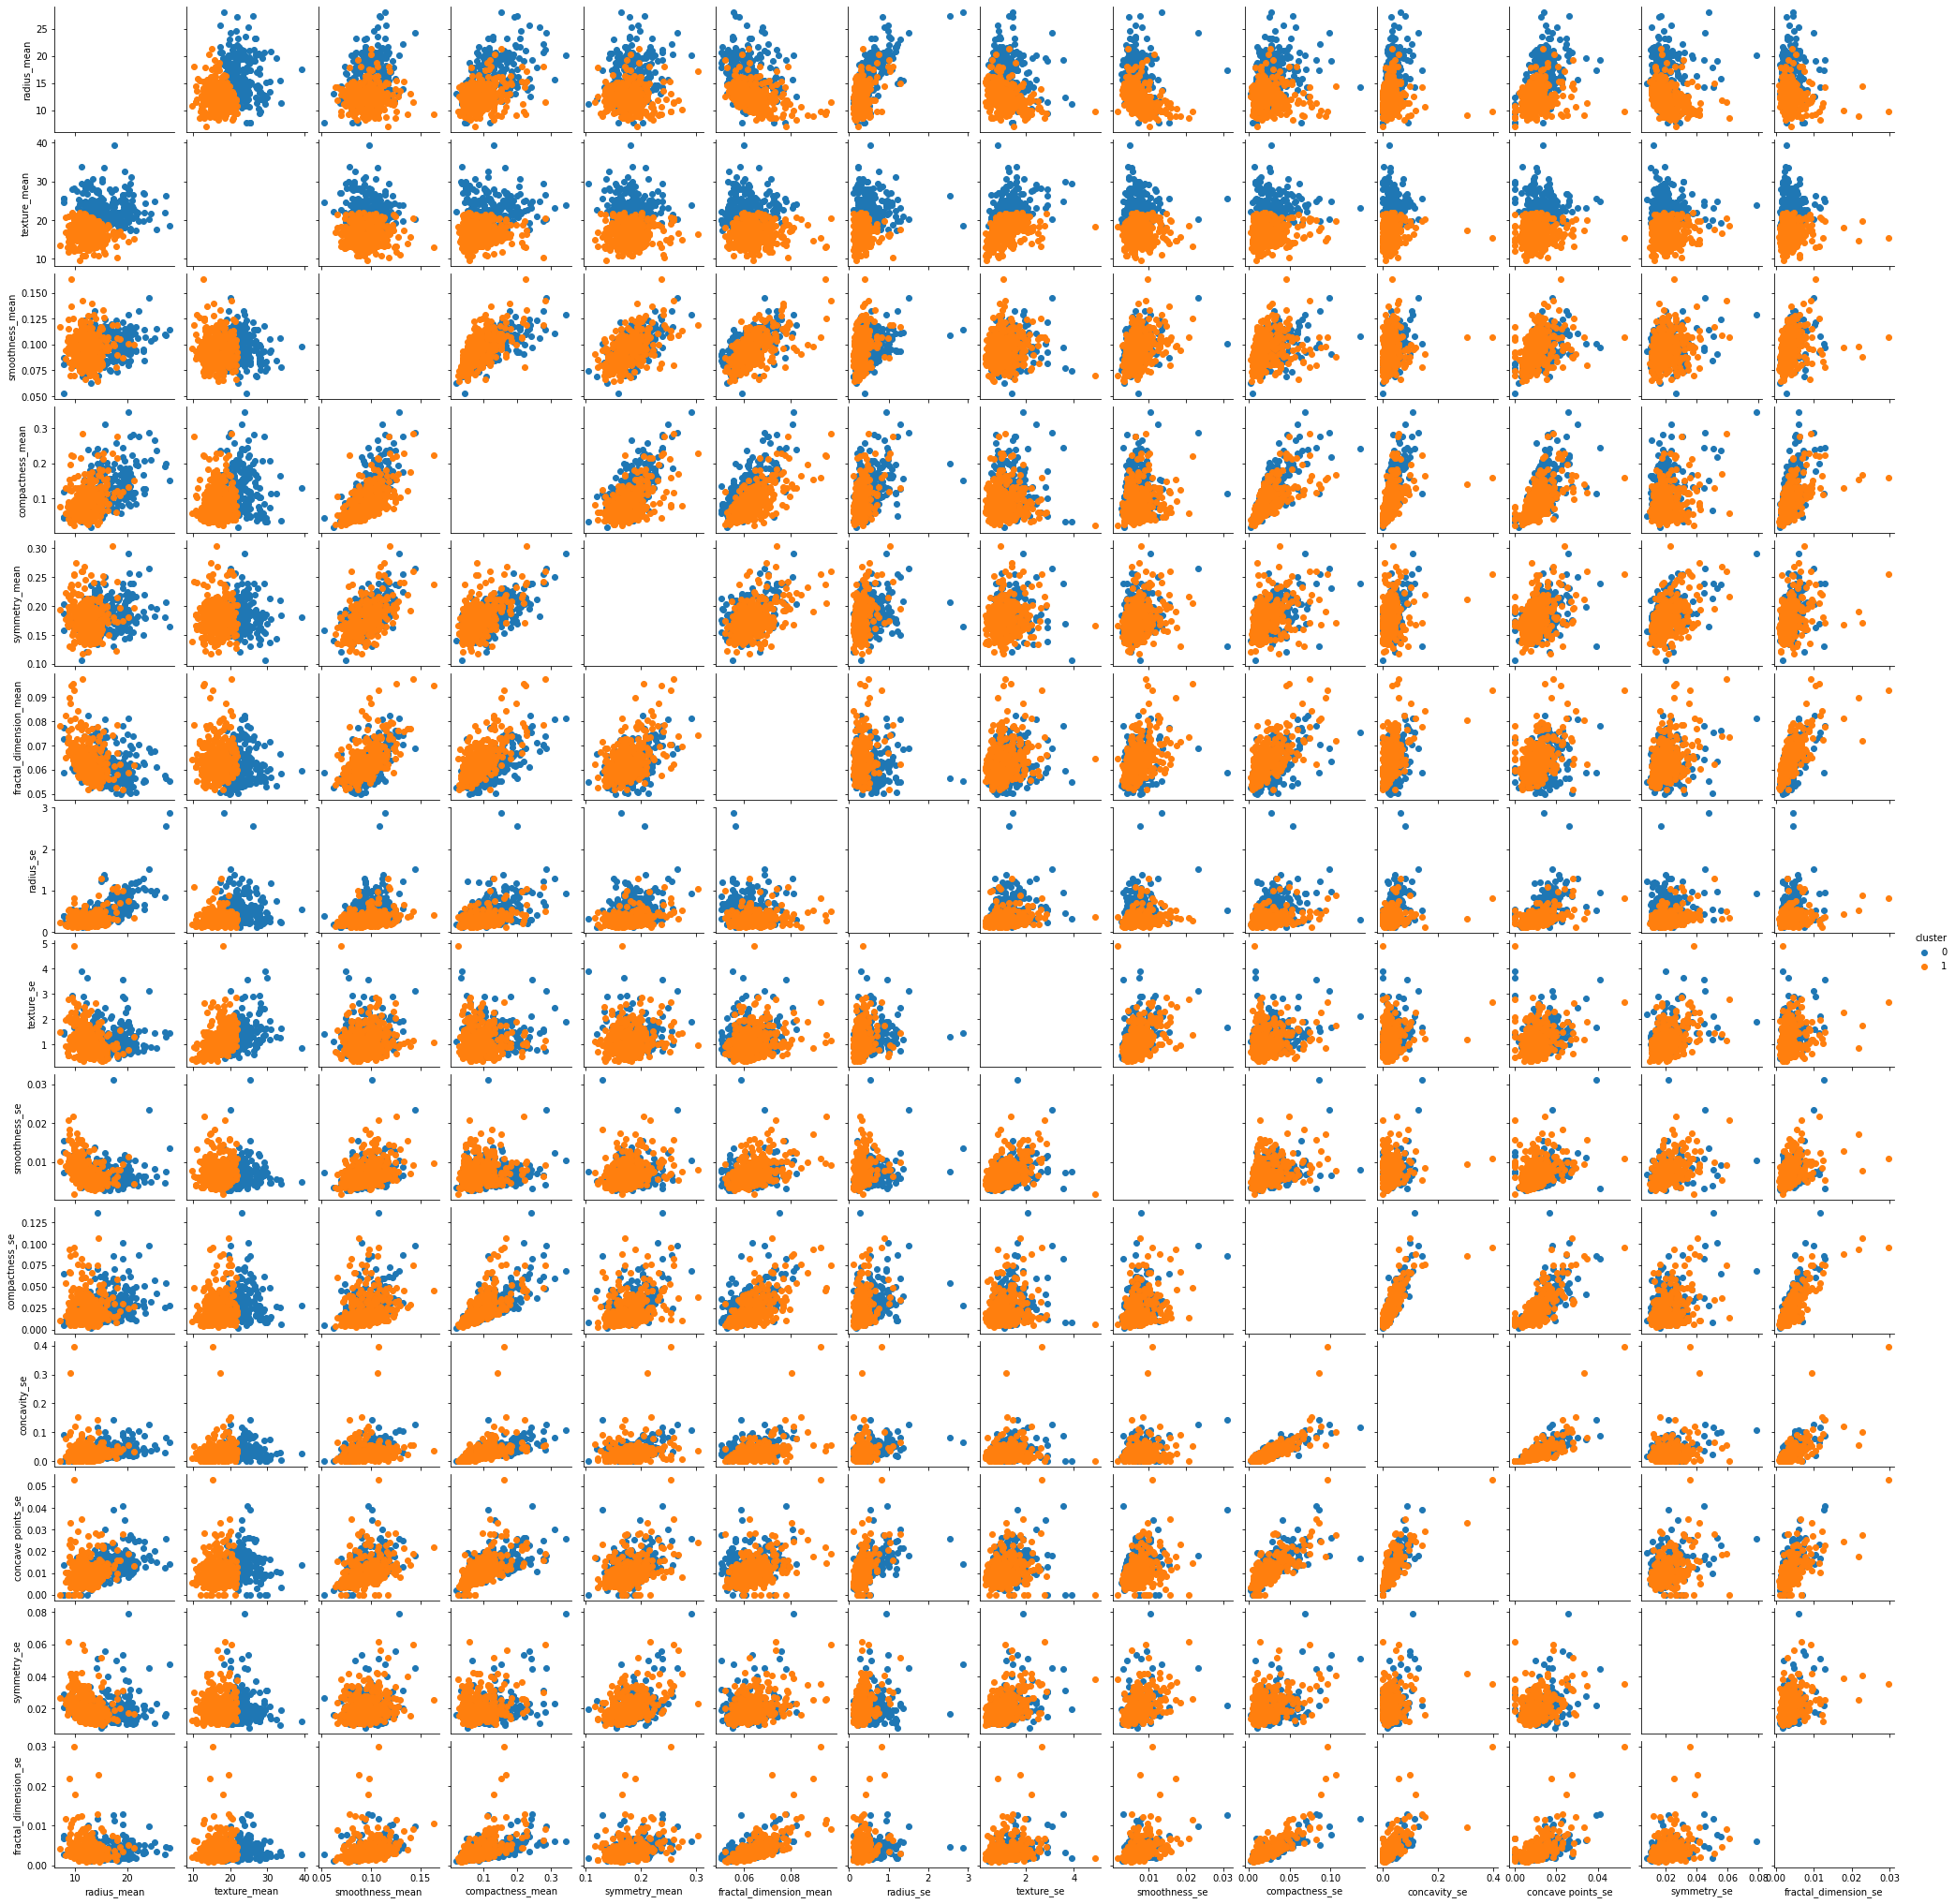

In [0]:
g = sns.PairGrid(cls_drop, hue="cluster")
g.map_offdiag(plt.scatter)
g.fig.set_size_inches(28,28)
g.add_legend()
plt.show()

**Overall look for normalized and dropped dataset**

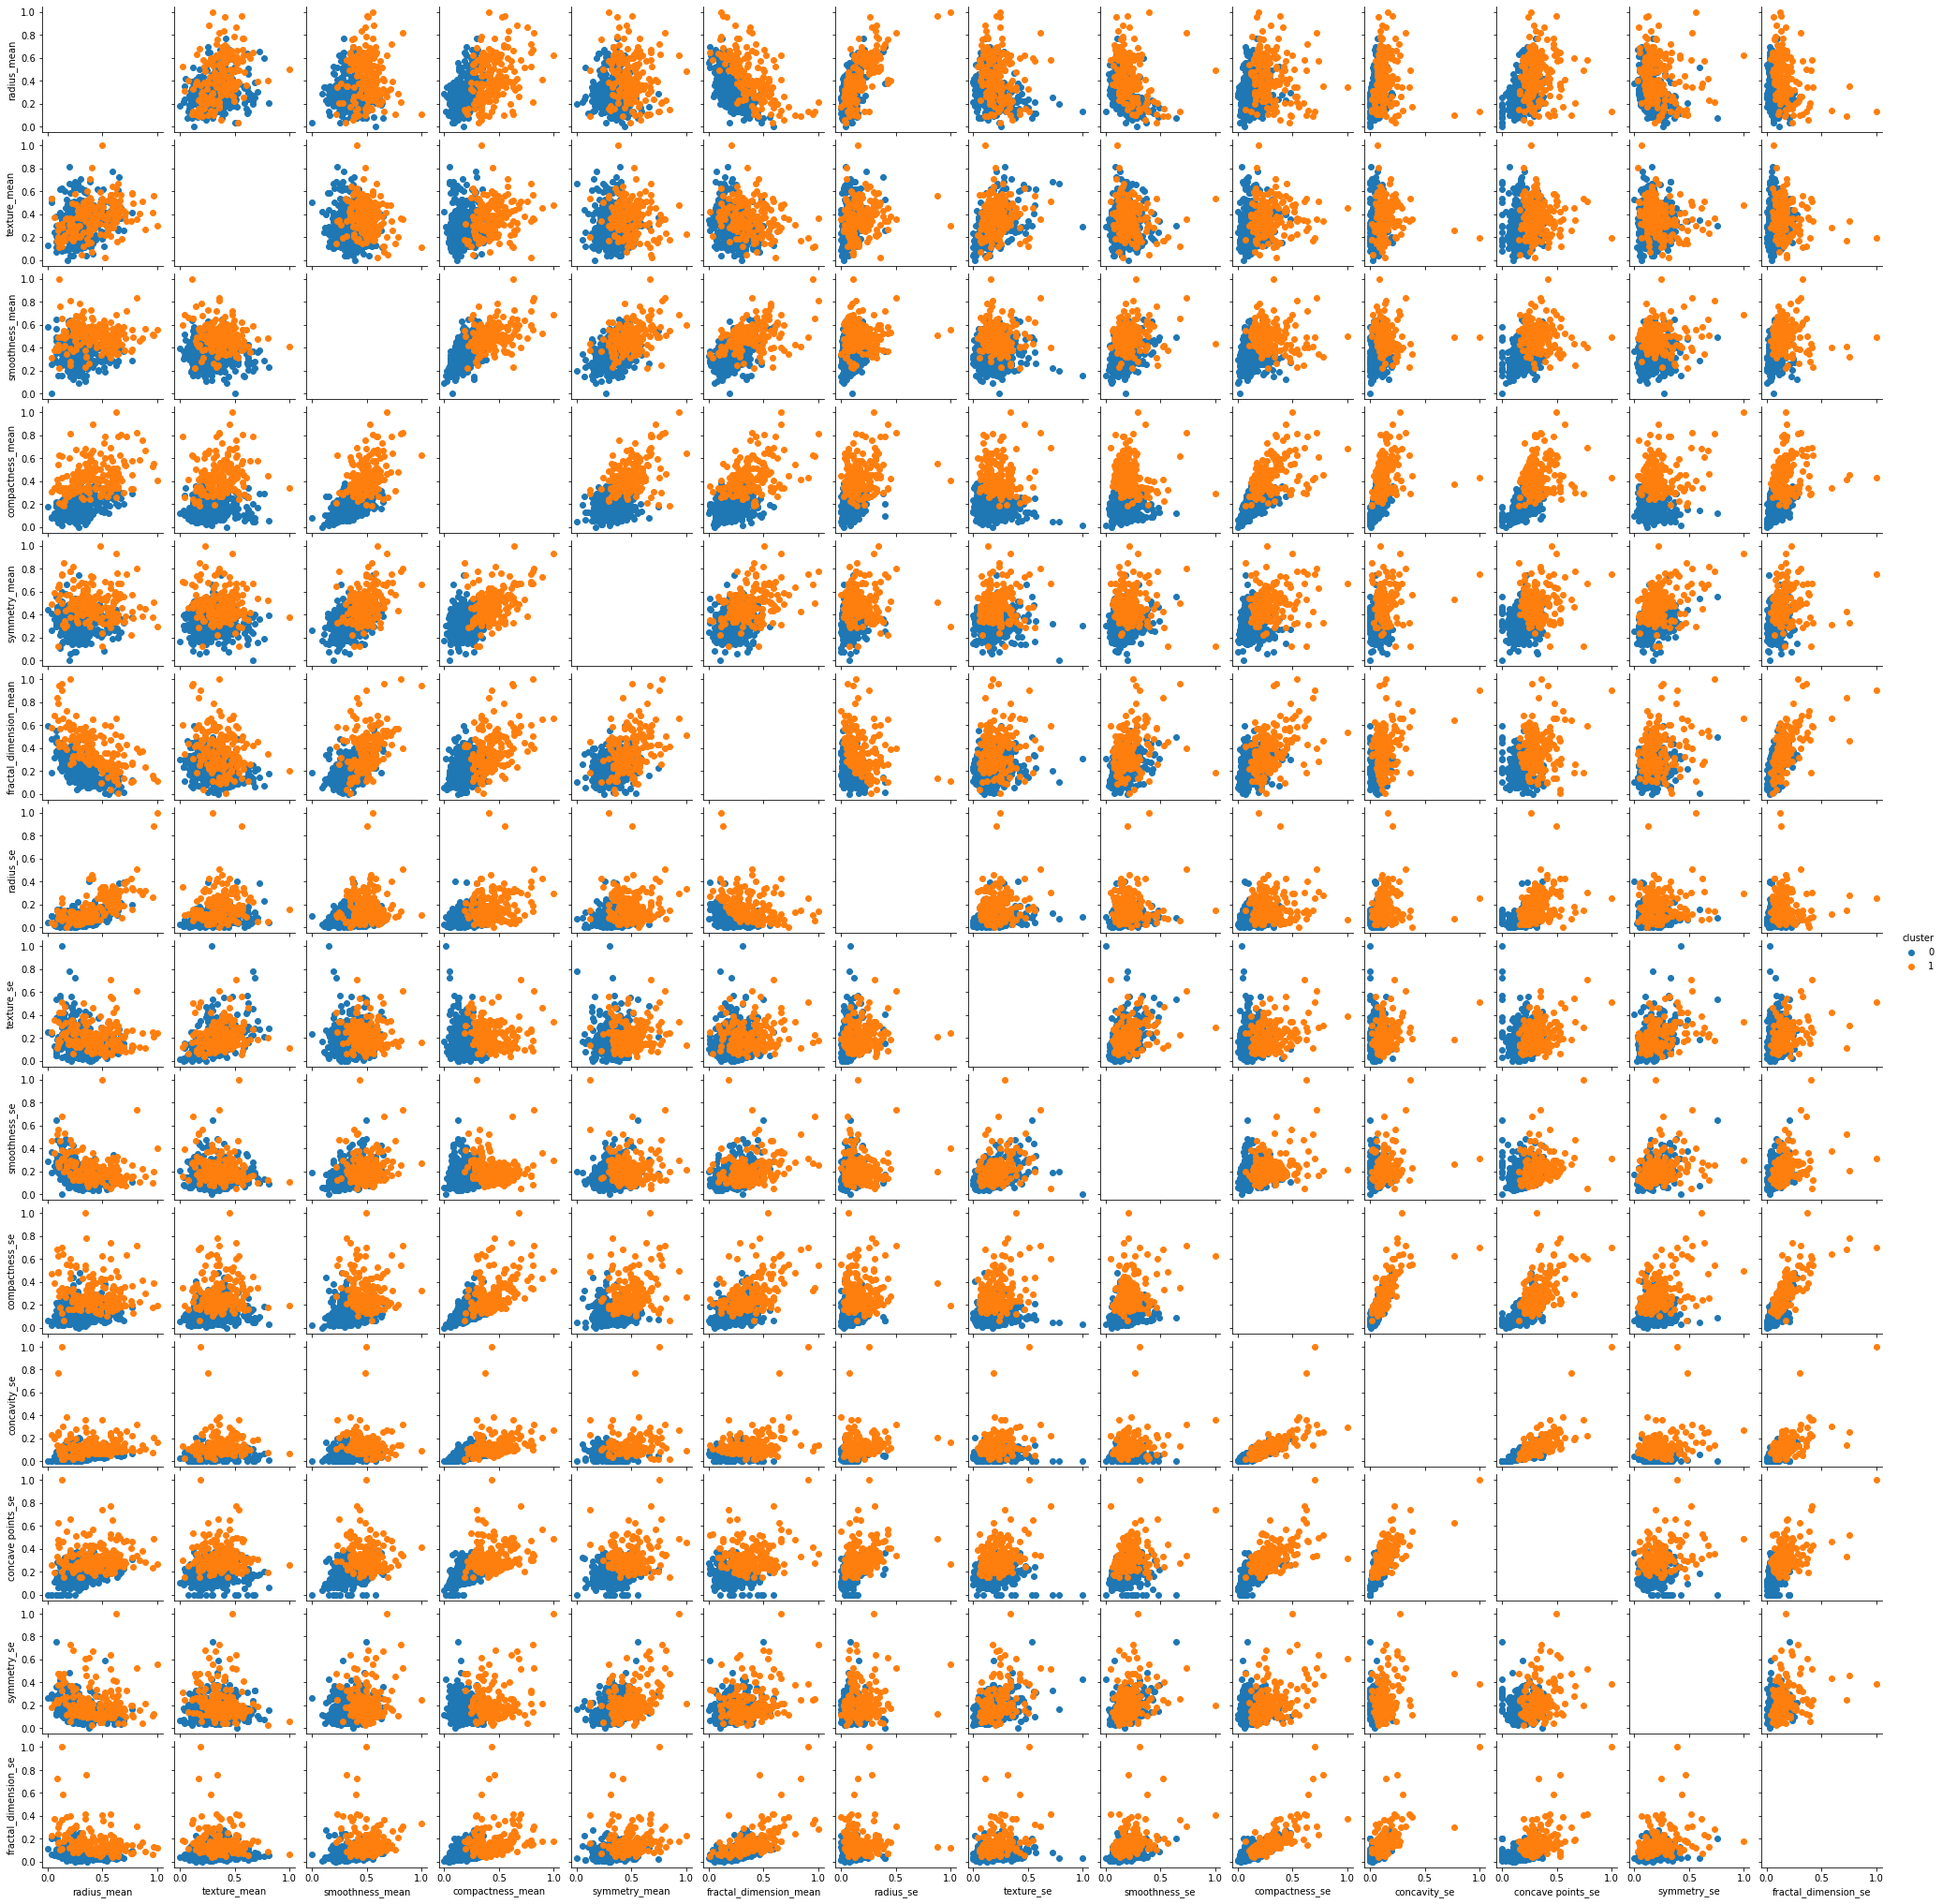

In [0]:
g = sns.PairGrid(cls_norm_drop, hue="cluster")
g.map_offdiag(plt.scatter)
g.fig.set_size_inches(28,28)
g.add_legend()
plt.show()

#### Conclusion - Part 1

Clustering is a method that seperates data into groups by looking their features. Clustering is used for unsupervised learning. But for our example we have target values for every feature vector. So using a supervised learning method would be more appropriate for this task. 

But in conclusion, almost all combinations have distinct seperations over data points. Geometrically, we have 14 to 30 feature columns so that means our data has 14 to 30 dimensions in space. Because of that, its hard to observe data points in space but we can look features one by one so we reduce the dimension to 2 (as we did in above). 

Finally, we can say that the data points seperated clear enough. But original dataset without any feature elimination 'seems' more successful.

### Part 2 - Classification

In this part we will use supervised learning techniques to classify our data. To make some comparison we will use 2 dataset like clustering. In addition to these dataset, we will check the results with feature elimination and full features.


For reminder (declared datasets above) :


- **X, y :** Not normalized, full features
- **X_dropped, y_dropped :** Not normalized, only 14 features


- **X_n, y_n :** Normalized, full features
- **X_n_dropped, y_n_dropped :** Normalized, only 14 features





In [0]:
from sklearn.model_selection import train_test_split

We will split our datasets into train and test subsets. I want to seperate 20% of the data as test set and the remainder as training set.
(To reproducability I assign random_state value as 9)

#### Functions for training and testing

In [0]:
# Not normalized, full features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9)
# Not normalized, 14 features
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_dropped, y_dropped, test_size=0.20, random_state=9)
# Normalized, full features
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.20, random_state=9)
# Normalized, 14 features
X_train_n_drop, X_test_n_drop, y_train_n_drop, y_test_n_drop = train_test_split(X_n_dropped, y_n_dropped, test_size=0.20, random_state=9)

As a novice data scientist, I don't know which algorithm to choose. So I will train several algorithms and evaluate their performance and make my decision after that.

In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [0]:
def doPrediction(Xin,yin,modType):
    #input: training/test data and labels, model type
    #supported models: SVM (l1 and l2), AdaBoost, decision tree, and random forest
    #train with 5-fold cross validation, then test once using test (holdout) data
    #once the best estimator is chosen here, train on the entire dataset (in + test) outside this function
    #output: training accuracy, gereralization accuracy, feature weights/importances, classifier, 
    #  classification report, training f1-score and generalization f1-score
    Xin, Xtest, yin, ytest = train_test_split(Xin, yin, test_size=0.20, random_state=9)
    nfolds = 5
    cv = StratifiedKFold(n_splits=nfolds, shuffle=True)

    # Model type chosen as SVM. We perform a grid search to find optimal parameters.
    if modType in ('SVM','svm'):
        clasf = svm.SVC()
        cvclasf = GridSearchCV(clasf, param_grid = {
            'kernel': ['poly', 'linear', 'rbf', 'sigmoid'],
            'tol': [0.01, 0.001, 0.0005],
            'C' : [0.05, 0.1, 0.5, 1, 5, 10, 500, 1000]
            }, verbose=0,refit=True,
            cv=cv,
            # scoring='roc_auc',
            scoring='f1_weighted',
        n_jobs=4)
    
    # Logistic Regression
    elif modType in ('lr','log','logistic-regression'):
        clasf = LogisticRegression()
        cvclasf = GridSearchCV(clasf, param_grid = {
            'C' : [0.05, 0.1, 0.5, 1, 5, 10, 500, 1000],
            'penalty' : ['l1', 'l2'],
            'tol': [0.01, 0.001, 0.0005],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            }, verbose=0,refit=True,
            cv=cv,
            scoring='f1_weighted',
        n_jobs=4)

    # Decision Tree Classifiers
    elif modType in ('dtree','decision-tree'):
        clasf = DecisionTreeClassifier()
        cvclasf = GridSearchCV(clasf, param_grid = {
            'splitter' : ['best', 'random'],
            'criterion' : ['entropy','gini'],
            'max_features' : [0.2,'sqrt',1.,None],
            'class_weight' : ['balanced', None], 
            }, verbose=0,refit=True,
            cv=cv,
            scoring='f1_weighted',
        n_jobs=4)

    # Random Forest
    elif modType in ('rf','random-forest'):
        clasf = RandomForestClassifier()
        cvclasf = GridSearchCV(clasf, param_grid = {
            'n_estimators' : [5,10,25,50,100],
            'criterion' : ['entropy','gini'],
            'max_features' : [0.2,'sqrt',1., None, 'auto'],
            'class_weight' : ['balanced', 'balanced_subsample', None], 
            }, verbose=0,refit=True,
            cv=cv,
            scoring='f1_weighted',
        n_jobs=4)
    
    # Gaussian Naive Bayes
    elif modType in ('naive', 'gnb'):
        clasf = GaussianNB()
        cvclasf = GridSearchCV(clasf, param_grid = {
            # There is no parameter needed for GNB.
            }, verbose=0, refit=True,
            cv=cv,
            scoring='f1_weighted',
        n_jobs=4)

    # Fit GridSearch
    cvclasf.fit(Xin,yin)
    # Take the best classifier
    bclasf = cvclasf.best_estimator_
    # Print out best parameters chosen for given model.
    if not modType in ('naive', 'gnb'):
        print("%s %d-fold best CV params: %s" % (modType,nfolds,cvclasf.best_params_))
    
    return bclasf

In [0]:
def testModel(X_train, X_test, y_train, y_test, modelType):
    
    clasf = doPrediction(X_train, y_train, modelType)

    y_pred = clasf.predict(X_test)

    training_score, test_score = clasf.score(X_train, y_train), clasf.score(X_test, y_test)
    print('Accuracy of {} classifier on training set: {:.4f}'.format(modelType, training_score))
    print('Accuracy of {} classifier on test set: {:.4f}'.format(modelType, test_score))
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.show()

    return training_score, test_score

#### Results for Original Data (30 features)

*Reminder:*
- *X_train, X_test, y_train, y_test : not normalized, 30 features*

In [0]:
# Results of the algoritms will be stored in here
results = {}

**Support Vector Machines (Classifier) aka. SVC or SVM**

SVM 5-fold best CV params: {'C': 0.5, 'kernel': 'linear', 'tol': 0.01}
Accuracy of SVM classifier on training set: 0.9626
Accuracy of SVM classifier on test set: 0.9474
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        74
           1       0.97      0.88      0.92        40

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



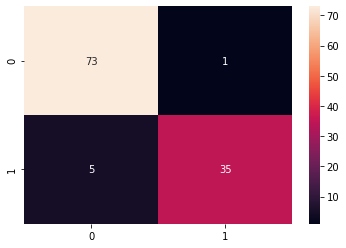

In [0]:
tr_score, te_score = testModel(X_train, X_test, y_train, y_test, 'SVM')

results['SVM'] = {
    'model': 'SVM',
    'training-score': tr_score,
    'test-score': te_score
}

**Gaussian Naive Bayes**

Accuracy of gnb classifier on training set: 0.9363
Accuracy of gnb classifier on test set: 0.9386
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        74
           1       0.92      0.90      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



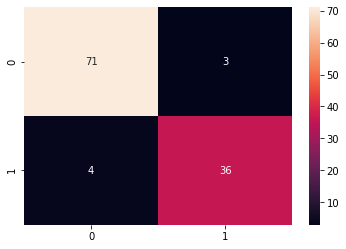

In [0]:
tr_score, te_score = testModel(X_train, X_test, y_train, y_test, 'gnb')
results['GNB'] = {
    'model': 'GNB',
    'training-score': tr_score,
    'test-score': te_score
}

**Decision Tree Classifier**

dtree 5-fold best CV params: {'class_weight': None, 'criterion': 'entropy', 'max_features': 0.2, 'splitter': 'random'}
Accuracy of dtree classifier on training set: 0.9824
Accuracy of dtree classifier on test set: 0.9211
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        74
           1       0.86      0.93      0.89        40

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



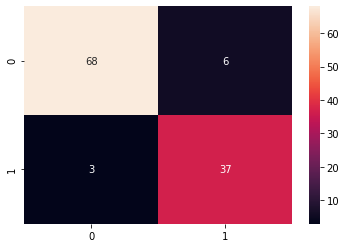

In [0]:
tr_score, te_score = testModel(X_train, X_test, y_train, y_test, 'dtree')
results['Decision-Tree'] = {
    'model': 'Decision-Tree',
    'training-score': tr_score,
    'test-score': te_score
}

**Random Forest Classifier**

rf 5-fold best CV params: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': None, 'n_estimators': 50}
Accuracy of rf classifier on training set: 0.9912
Accuracy of rf classifier on test set: 0.9474
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        74
           1       1.00      0.85      0.92        40

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



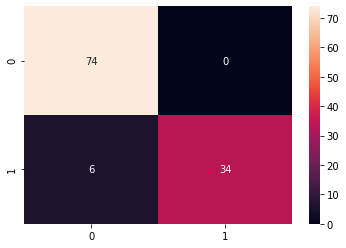

In [0]:
tr_score, te_score = testModel(X_train, X_test, y_train, y_test, 'rf')
results['Random-Forest'] = {
    'model': 'Random-Forest',
    'training-score': tr_score,
    'test-score': te_score
}

**Logistic Regression**

lr 5-fold best CV params: {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
Accuracy of lr classifier on training set: 0.9890
Accuracy of lr classifier on test set: 0.9649
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        74
           1       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



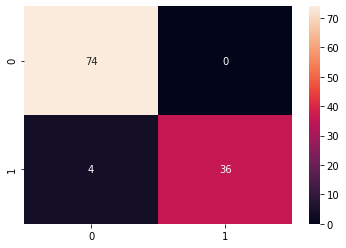

In [0]:
tr_score, te_score = testModel(X_train, X_test, y_train, y_test, 'lr')
results['Log-Regression'] = {
    'model': 'Log-Regression',
    'training-score': tr_score,
    'test-score': te_score
}

**Conclusion - Original Dataset (30 Features**)

In [0]:
results_df = pd.DataFrame(results).transpose()

In [0]:
results_df

model training-score test-score
SVM                        SVM       0.962637   0.947368
GNB                        GNB       0.936264   0.938596
Decision-Tree    Decision-Tree       0.982418   0.921053
Random-Forest    Random-Forest       0.991209   0.947368
Log-Regression  Log-Regression       0.989011   0.964912

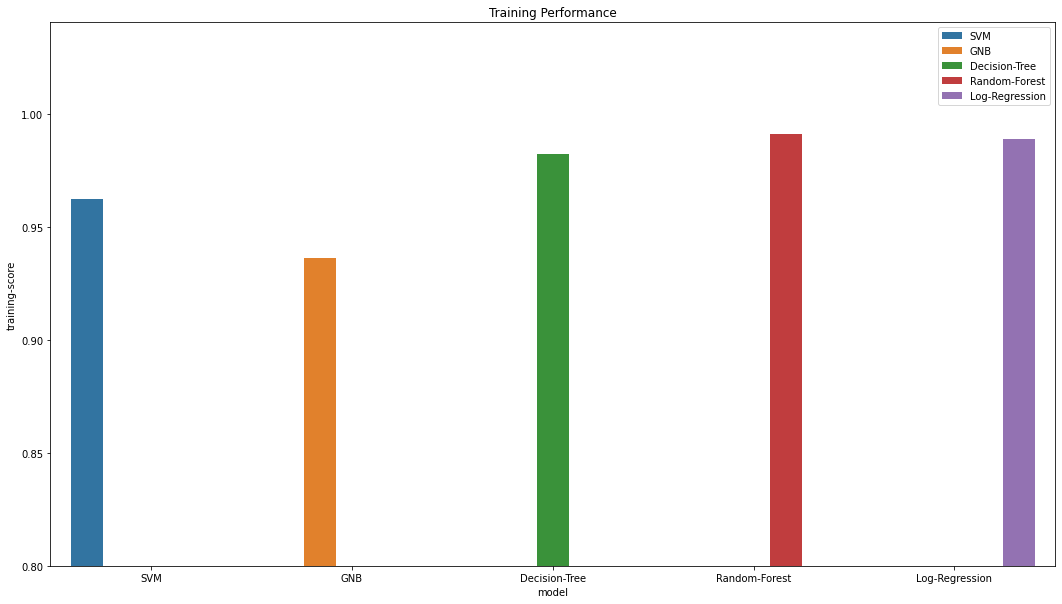

In [0]:
plt.figure(figsize=(18,10))
g=sns.barplot(x='model', y='training-score', hue='model', data=results_df)
g.axes.set_ylim(0.8,)
plt.title("Training Performance")
plt.legend(loc='best')
plt.show()

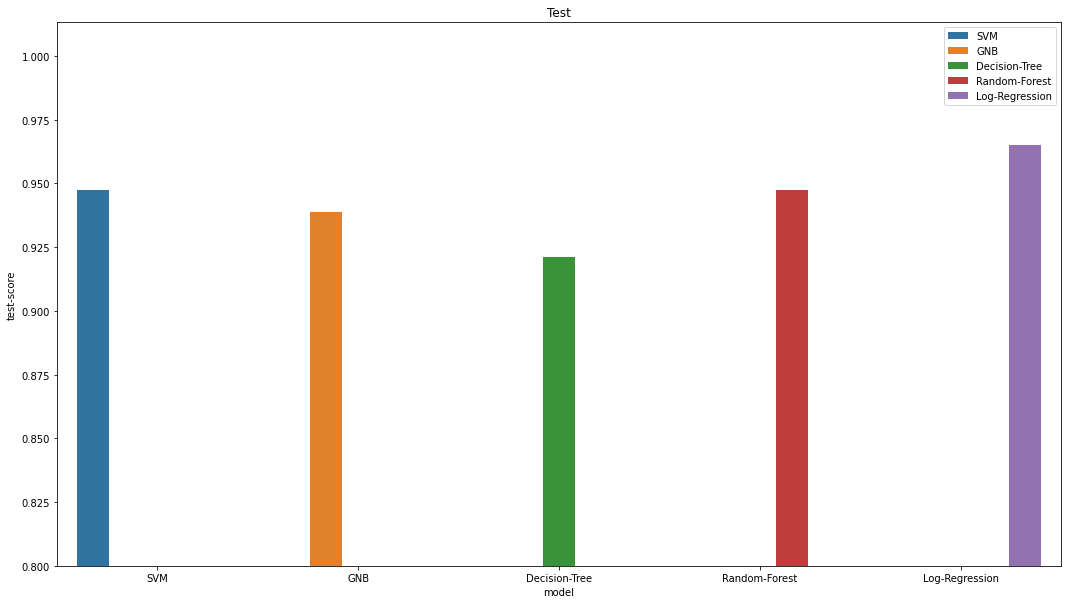

In [0]:
plt.figure(figsize=(18,10))
g=sns.barplot(x='model', y='test-score', hue='model', data=results_df)
g.axes.set_ylim(0.8,)
plt.legend(loc='best')
plt.title("Test")
plt.show()

In [0]:
print("Best Training Performance")
print(results_df.sort_values(by=['training-score'], ascending=False).iloc[0, :])
print("Best Test Performance")
print(results_df.sort_values(by=['test-score', 'training-score'], ascending=False).iloc[0, :])

Best Training Performance
model             Random-Forest
training-score         0.991209
test-score             0.947368
Name: Random-Forest, dtype: object
Best Test Performance
model             Log-Regression
training-score          0.989011
test-score              0.964912
Name: Log-Regression, dtype: object


Random Forest model reached 99.1% training accuracy. But it has only predicted 94.7% of the test samples correct.

In the other hand, Logistic Regression has the best testing performance. Also it has pretty high training accuracy. Training accuracy is 98.9% and test accuracy is 96.5%.

#### Results for Normalized Data (30 features)

*Reminder:*
- *X_train_n, X_test_n, y_train_n, y_test_n : normalized, 30 features*

In [0]:
# Results of the algoritms will be stored in here
results_n = {}

**Support Vector Machines (Classifier) aka. SVC or SVM**

SVM 5-fold best CV params: {'C': 5, 'kernel': 'rbf', 'tol': 0.01}
Accuracy of SVM classifier on training set: 0.9890
Accuracy of SVM classifier on test set: 0.9737
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        74
         1.0       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



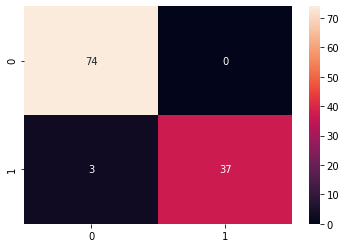

In [0]:
tr_score, te_score = testModel(X_train_n, X_test_n, y_train_n, y_test_n, 'SVM')

results_n['SVM'] = {
    'model': 'SVM',
    'training-score': tr_score,
    'test-score': te_score
}

**Gaussian Naive Bayes**

Accuracy of gnb classifier on training set: 0.9297
Accuracy of gnb classifier on test set: 0.9298
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95        74
         1.0       0.88      0.93      0.90        40

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



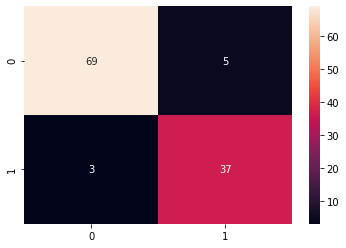

In [0]:
tr_score, te_score = testModel(X_train_n, X_test_n, y_train_n, y_test_n, 'gnb')
results_n['GNB'] = {
    'model': 'GNB',
    'training-score': tr_score,
    'test-score': te_score
}

**Decision Tree Classifier**

dtree 5-fold best CV params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}
Accuracy of dtree classifier on training set: 0.9912
Accuracy of dtree classifier on test set: 0.9737
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        74
         1.0       1.00      0.93      0.96        40

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



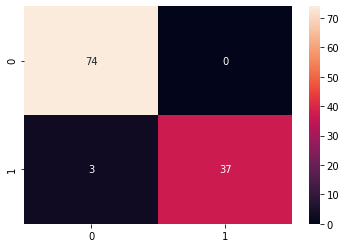

In [0]:
tr_score, te_score = testModel(X_train_n, X_test_n, y_train_n, y_test_n, 'dtree')
results_n['Decision-Tree'] = {
    'model': 'Decision-Tree',
    'training-score': tr_score,
    'test-score': te_score
}

**Random Forest Classifier**

rf 5-fold best CV params: {'class_weight': None, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}
Accuracy of rf classifier on training set: 0.9846
Accuracy of rf classifier on test set: 0.9649
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        74
         1.0       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



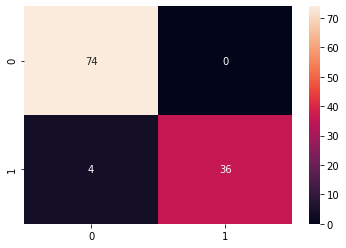

In [0]:
tr_score, te_score = testModel(X_train_n, X_test_n, y_train_n, y_test_n, 'rf')
results_n['Random-Forest'] = {
    'model': 'Random-Forest',
    'training-score': tr_score,
    'test-score': te_score
}

**Logistic Regression**

lr 5-fold best CV params: {'C': 5, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.01}
Accuracy of lr classifier on training set: 0.9802
Accuracy of lr classifier on test set: 0.9649
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        74
         1.0       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



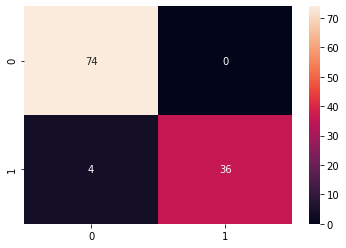

In [0]:
tr_score, te_score = testModel(X_train_n, X_test_n, y_train_n, y_test_n, 'lr')
results_n['Log-Regression'] = {
    'model': 'Log-Regression',
    'training-score': tr_score,
    'test-score': te_score
}

**Conclusion - Original Dataset (30 Features**)

In [0]:
results_df_n = pd.DataFrame(results_n).transpose()

In [0]:
results_df_n

model training-score test-score
SVM                        SVM       0.989011   0.973684
GNB                        GNB        0.92967   0.929825
Decision-Tree    Decision-Tree       0.991209   0.973684
Random-Forest    Random-Forest       0.984615   0.964912
Log-Regression  Log-Regression        0.98022   0.964912

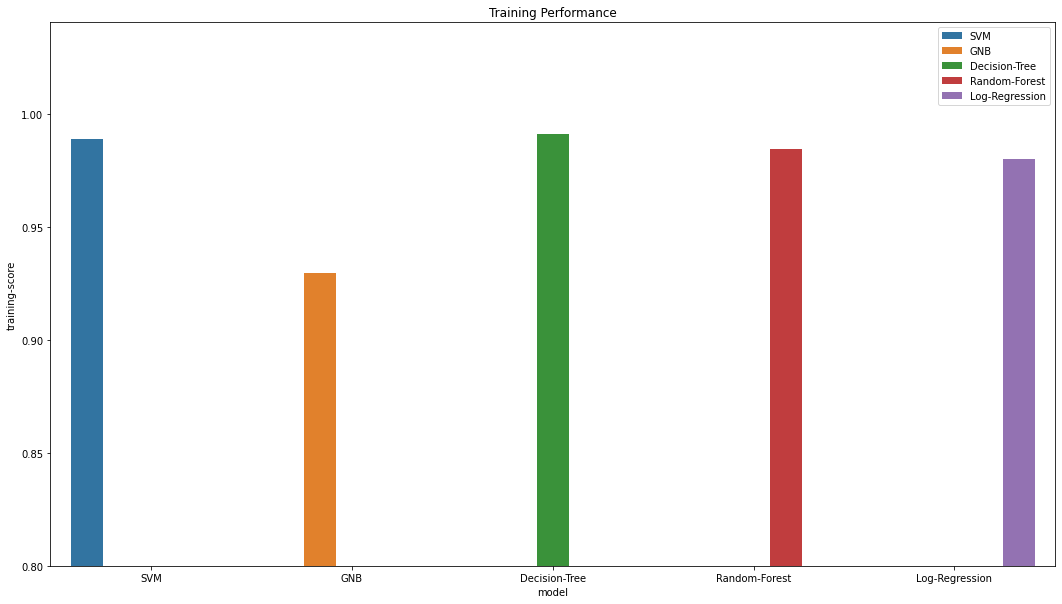

In [0]:
plt.figure(figsize=(18,10))
g=sns.barplot(x='model', y='training-score', hue='model', data=results_df_n)
g.axes.set_ylim(0.8,)
plt.title("Training Performance")
plt.legend(loc='best')
plt.show()

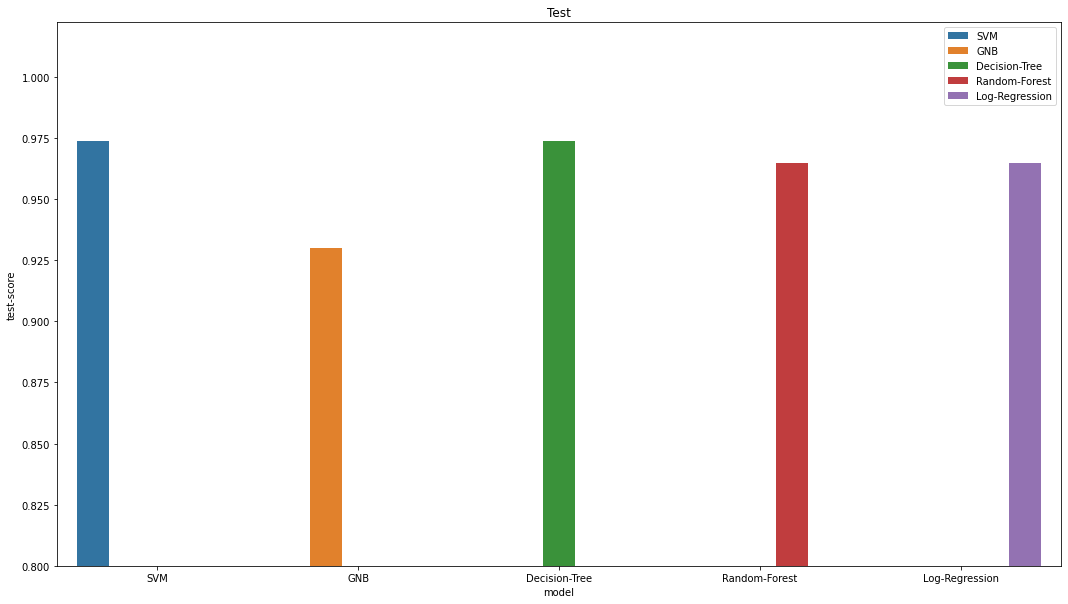

In [0]:
plt.figure(figsize=(18,10))
g = sns.barplot(x='model', y='test-score', hue='model', data=results_df_n)
g.axes.set_ylim(0.80,)

plt.legend(loc='best')
plt.title("Test")
plt.show()

In [0]:
print("Best Training Performance")
print(results_df_n.sort_values(by=['training-score'], ascending=False).iloc[0, :])
print("Best Test Performance")
print(results_df_n.sort_values(by=['test-score', 'training-score'], ascending=False).iloc[0, :])

Best Training Performance
model             Decision-Tree
training-score         0.991209
test-score             0.973684
Name: Decision-Tree, dtype: object
Best Test Performance
model             Decision-Tree
training-score         0.991209
test-score             0.973684
Name: Decision-Tree, dtype: object


For normalized data, the general results are higher than original data.

On the results we see that the best performaned model is Decision Tree Classifier. It has 99.1% training and 97.4% test accuracy. Also other classifiers performed very well. There is no huge gap between performances.

#### Results for Original Data (14 features)

*Reminder:*
- *X_train_drop, X_test_drop, y_train_drop, y_test_drop : Not normalized, 14 features*

In [0]:
# Results of the algoritms will be stored in here
results_drop = {}

**Support Vector Machines (Classifier) aka. SVC or SVM**

SVM 5-fold best CV params: {'C': 1000, 'kernel': 'linear', 'tol': 0.01}
Accuracy of SVM classifier on training set: 0.9385
Accuracy of SVM classifier on test set: 0.9386
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        74
           1       0.90      0.93      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



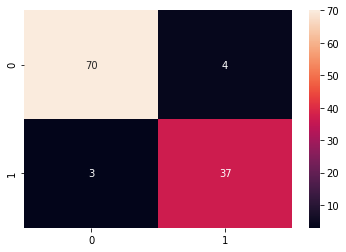

In [0]:
tr_score, te_score = testModel(X_train_drop, X_test_drop, y_train_drop, y_test_drop, 'SVM')

results_drop['SVM'] = {
    'model': 'SVM',
    'training-score': tr_score,
    'test-score': te_score
}

**Gaussian Naive Bayes**

Accuracy of gnb classifier on training set: 0.8923
Accuracy of gnb classifier on test set: 0.8772
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        74
           1       0.81      0.85      0.83        40

    accuracy                           0.88       114
   macro avg       0.86      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



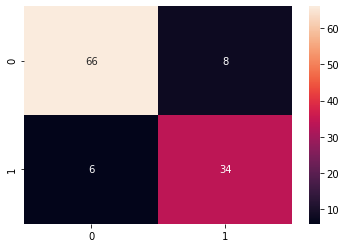

In [0]:
tr_score, te_score = testModel(X_train_drop, X_test_drop, y_train_drop, y_test_drop, 'gnb')
results_drop['GNB'] = {
    'model': 'GNB',
    'training-score': tr_score,
    'test-score': te_score
}

**Decision Tree Classifier**

dtree 5-fold best CV params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 1.0, 'splitter': 'best'}
Accuracy of dtree classifier on training set: 0.9802
Accuracy of dtree classifier on test set: 0.8684
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        74
           1       0.82      0.80      0.81        40

    accuracy                           0.87       114
   macro avg       0.86      0.85      0.85       114
weighted avg       0.87      0.87      0.87       114



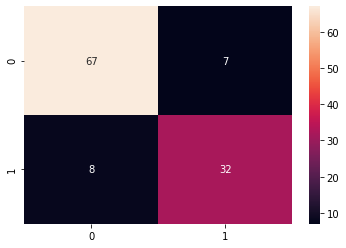

In [0]:
tr_score, te_score = testModel(X_train_drop, X_test_drop, y_train_drop, y_test_drop, 'dtree')
results_drop['Decision-Tree'] = {
    'model': 'Decision-Tree',
    'training-score': tr_score,
    'test-score': te_score
}

**Random Forest Classifier**

rf 5-fold best CV params: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 1.0, 'n_estimators': 50}
Accuracy of rf classifier on training set: 0.9824
Accuracy of rf classifier on test set: 0.9211
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        74
           1       0.94      0.82      0.88        40

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



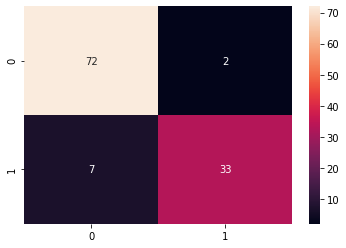

In [0]:
tr_score, te_score = testModel(X_train_drop, X_test_drop, y_train_drop, y_test_drop, 'rf')
results_drop['Random-Forest'] = {
    'model': 'Random-Forest',
    'training-score': tr_score,
    'test-score': te_score
}

**Logistic Regression**

lr 5-fold best CV params: {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0005}
Accuracy of lr classifier on training set: 0.9516
Accuracy of lr classifier on test set: 0.9386
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        74
           1       0.90      0.93      0.91        40

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



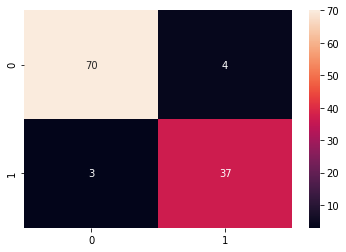

In [0]:
tr_score, te_score = testModel(X_train_drop, X_test_drop, y_train_drop, y_test_drop, 'lr')
results_drop['Log-Regression'] = {
    'model': 'Log-Regression',
    'training-score': tr_score,
    'test-score': te_score
}

**Conclusion - Original Dataset (30 Features**)

In [0]:
results_df_drop = pd.DataFrame(results_drop).transpose()

In [0]:
results_df_drop

model training-score test-score
SVM                        SVM       0.938462   0.938596
GNB                        GNB       0.892308   0.877193
Decision-Tree    Decision-Tree        0.98022   0.868421
Random-Forest    Random-Forest       0.982418   0.921053
Log-Regression  Log-Regression       0.951648   0.938596

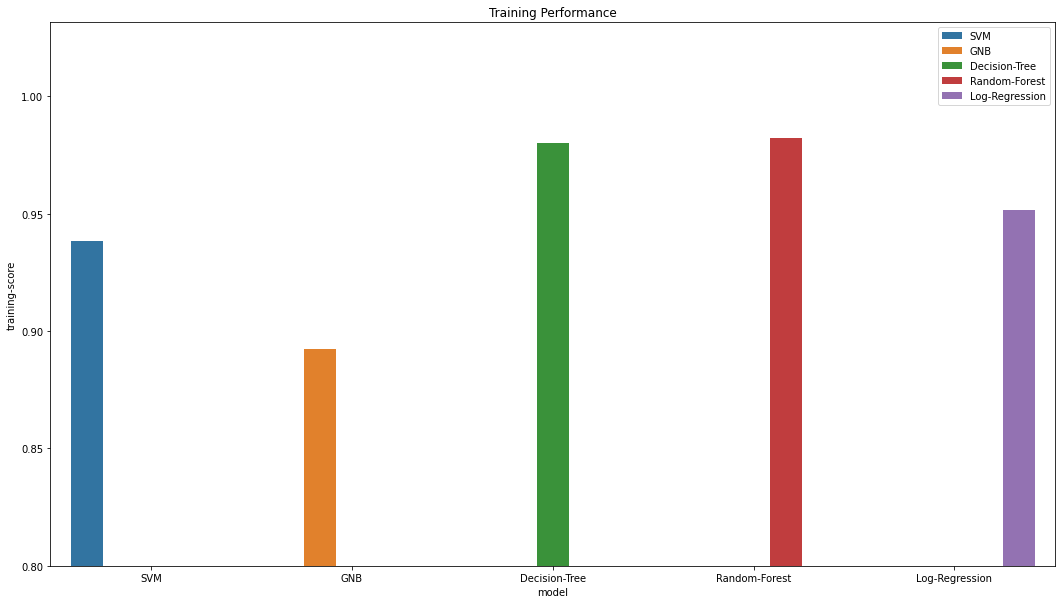

In [0]:
plt.figure(figsize=(18,10))
g=sns.barplot(x='model', y='training-score', hue='model', data=results_df_drop)
g.axes.set_ylim(0.8,)
plt.title("Training Performance")
plt.legend(loc='best')
plt.show()

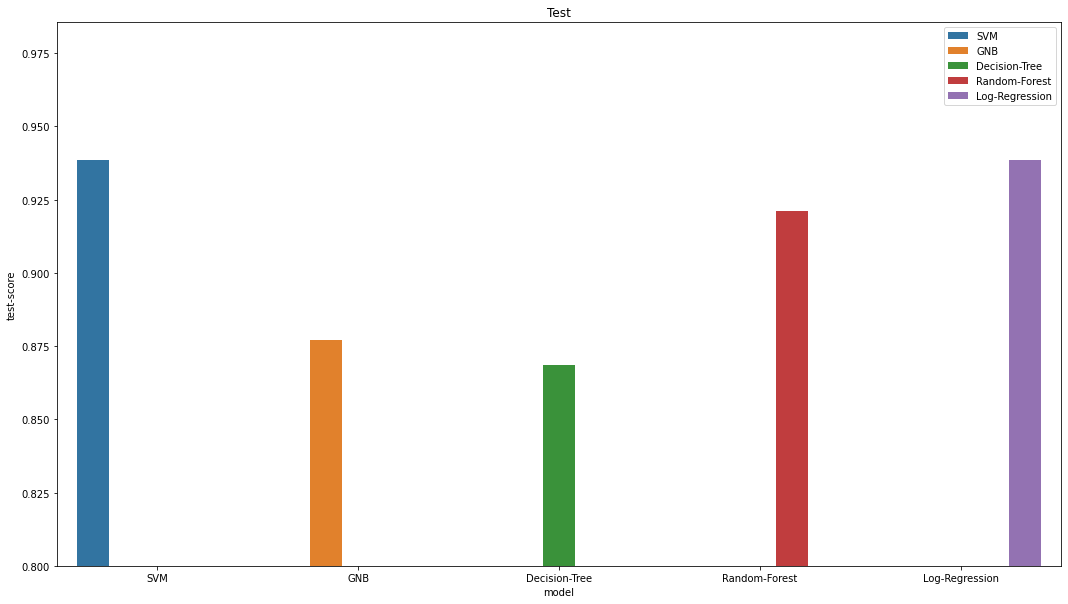

In [0]:
plt.figure(figsize=(18,10))
g = sns.barplot(x='model', y='test-score', hue='model', data=results_df_drop)
g.axes.set_ylim(0.80,)

plt.legend(loc='best')
plt.title("Test")
plt.show()

In [0]:
print("Best Training Performance")
print(results_df_drop.sort_values(by=['training-score'], ascending=False).iloc[0, :])
print("Best Test Performance")
print(results_df_drop.sort_values(by=['test-score', 'training-score'], ascending=False).iloc[0, :])

Best Training Performance
model             Random-Forest
training-score         0.982418
test-score             0.921053
Name: Random-Forest, dtype: object
Best Test Performance
model             Log-Regression
training-score          0.951648
test-score              0.938596
Name: Log-Regression, dtype: object


Original data with reduced features, performed less accurate than the first two datasets.

In training results, the most accurate model is Random Forest classifier. But it has lower test accuracy.

In overall, the best performing model is Logistic Regression. It has 95.2% training and 93.9% test accuracy.

#### Results for Normalized Data (14 features)

*Reminder:*
- *X_train_n_drop, X_test_n_drop, y_train_n_drop, y_test_n_drop : Normalized, 14 features*



In [0]:
# Results of the algoritms will be stored in here
results_drop_n = {}

**Support Vector Machines (Classifier) aka. SVC or SVM**

SVM 5-fold best CV params: {'C': 1000, 'kernel': 'linear', 'tol': 0.01}
Accuracy of SVM classifier on training set: 0.9560
Accuracy of SVM classifier on test set: 0.9474
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        74
         1.0       0.93      0.93      0.93        40

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



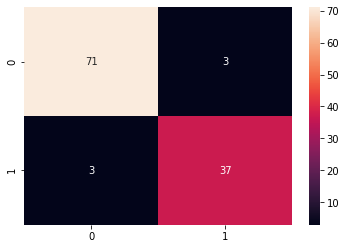

In [0]:
tr_score, te_score = testModel(X_train_n_drop, X_test_n_drop, y_train_n_drop, y_test_n_drop, 'SVM')

results_drop_n['SVM'] = {
    'model': 'SVM',
    'training-score': tr_score,
    'test-score': te_score
}

**Gaussian Naive Bayes**

Accuracy of gnb classifier on training set: 0.8923
Accuracy of gnb classifier on test set: 0.8772
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        74
         1.0       0.81      0.85      0.83        40

    accuracy                           0.88       114
   macro avg       0.86      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



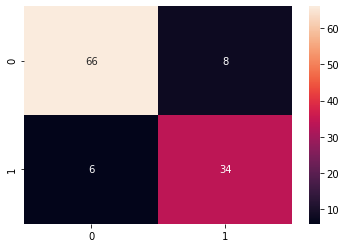

In [0]:
tr_score, te_score = testModel(X_train_n_drop, X_test_n_drop, y_train_n_drop, y_test_n_drop, 'gnb')
results_drop_n['GNB'] = {
    'model': 'GNB',
    'training-score': tr_score,
    'test-score': te_score
}

**Decision Tree Classifier**

dtree 5-fold best CV params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 1.0, 'splitter': 'best'}
Accuracy of dtree classifier on training set: 0.9758
Accuracy of dtree classifier on test set: 0.9123
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        74
         1.0       0.92      0.82      0.87        40

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



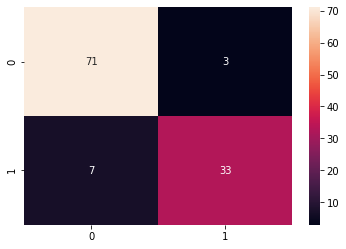

In [0]:
tr_score, te_score = testModel(X_train_n_drop, X_test_n_drop, y_train_n_drop, y_test_n_drop, 'dtree')
results_drop_n['Decision-Tree'] = {
    'model': 'Decision-Tree',
    'training-score': tr_score,
    'test-score': te_score
}

**Random Forest Classifier**

rf 5-fold best CV params: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 0.2, 'n_estimators': 50}
Accuracy of rf classifier on training set: 0.9824
Accuracy of rf classifier on test set: 0.9123
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        74
         1.0       0.92      0.82      0.87        40

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



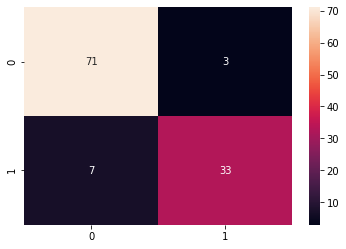

In [0]:
tr_score, te_score = testModel(X_train_n_drop, X_test_n_drop, y_train_n_drop, y_test_n_drop, 'rf')
results_drop_n['Random-Forest'] = {
    'model': 'Random-Forest',
    'training-score': tr_score,
    'test-score': te_score
}

**Logistic Regression**

lr 5-fold best CV params: {'C': 10, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}
Accuracy of lr classifier on training set: 0.9407
Accuracy of lr classifier on test set: 0.9298
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        74
         1.0       0.92      0.88      0.90        40

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



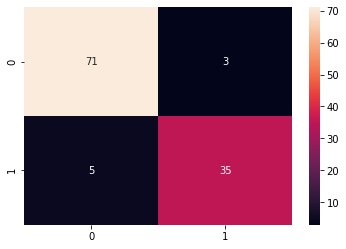

In [0]:
tr_score, te_score = testModel(X_train_n_drop, X_test_n_drop, y_train_n_drop, y_test_n_drop, 'lr')
results_drop_n['Log-Regression'] = {
    'model': 'Log-Regression',
    'training-score': tr_score,
    'test-score': te_score
}

**Conclusion - Original Dataset (30 Features**)

In [0]:
results_df_drop_n = pd.DataFrame(results_drop_n).transpose()

In [0]:
results_df_drop_n

model training-score test-score
SVM                        SVM       0.956044   0.947368
GNB                        GNB       0.892308   0.877193
Decision-Tree    Decision-Tree       0.975824   0.912281
Random-Forest    Random-Forest       0.982418   0.912281
Log-Regression  Log-Regression       0.940659   0.929825

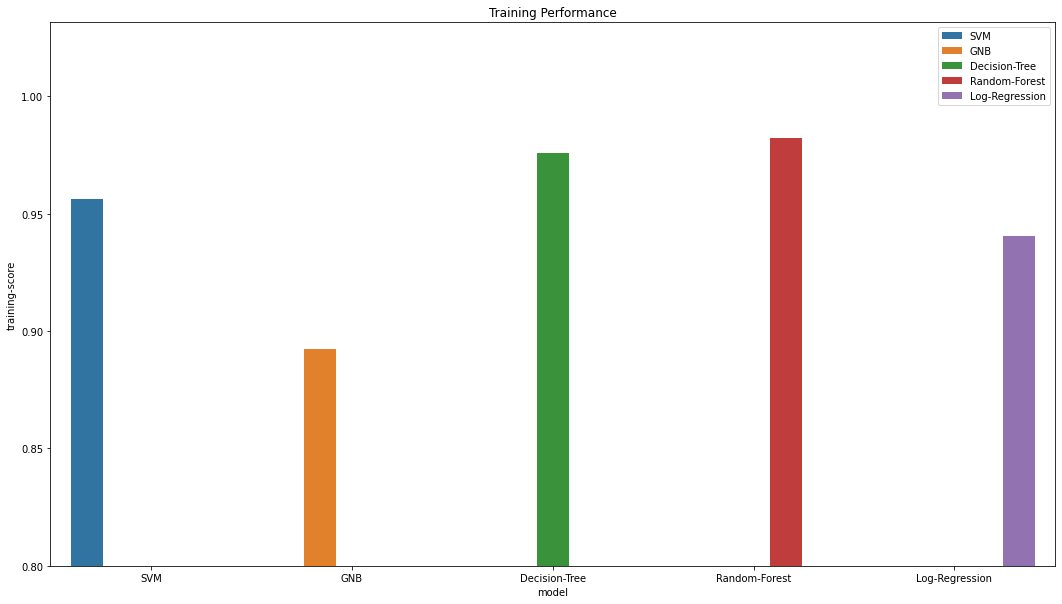

In [0]:
plt.figure(figsize=(18,10))
g=sns.barplot(x='model', y='training-score', hue='model', data=results_df_drop_n)
g.axes.set_ylim(0.8,)
plt.title("Training Performance")
plt.legend(loc='best')
plt.show()

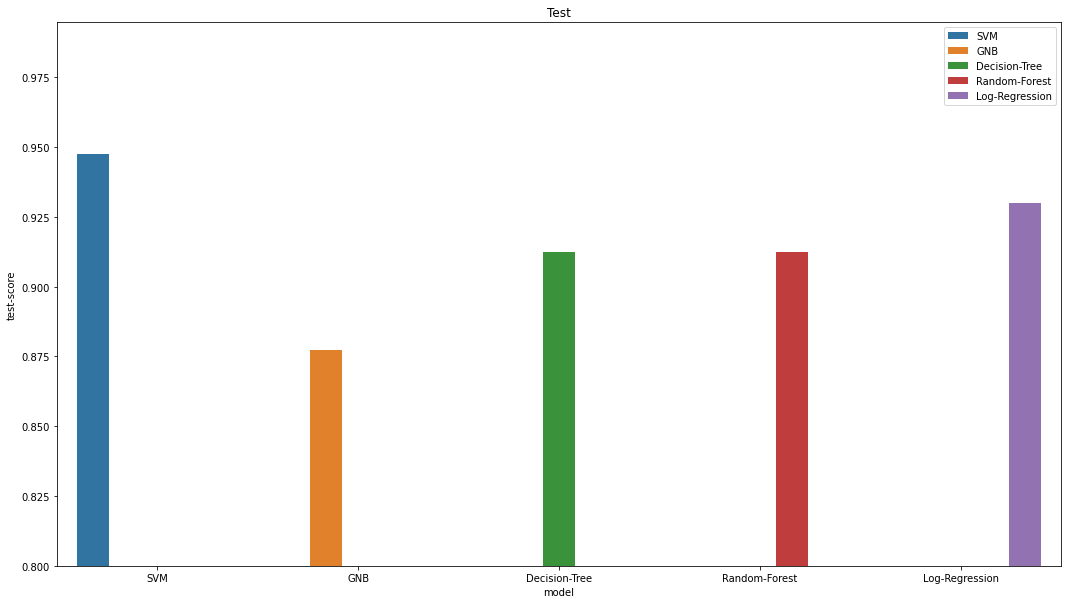

In [0]:
plt.figure(figsize=(18,10))
g = sns.barplot(x='model', y='test-score', hue='model', data=results_df_drop_n)
g.axes.set_ylim(0.80,)

plt.legend(loc='best')
plt.title("Test")
plt.show()

In [0]:
print("Best Training Performance")
print(results_df_drop_n.sort_values(by=['training-score'], ascending=False).iloc[0, :])
print("Best Test Performance")
print(results_df_drop_n.sort_values(by=['test-score', 'training-score'], ascending=False).iloc[0, :])

Best Training Performance
model             Random-Forest
training-score         0.982418
test-score             0.912281
Name: Random-Forest, dtype: object
Best Test Performance
model                  SVM
training-score    0.956044
test-score        0.947368
Name: SVM, dtype: object


Last experiment is done with normalized and reduced dataset. This dataset has 14 features and these feaures are normalized values of the original dataset.

The overall performance is above average. The best training performance is 98.2% with Random Forest. But in averall, the best performance is 95.6% training and 94.7% test score with SVM model.

### CONCLUSION

We have performed 4 different experiments.

In [0]:
overall_results = {
    'Original': results,
    'Reduced Original': results_drop,
    'Normalized': results_n,
    'Reduced Normalized': results_drop_n
}

In [0]:
overall_df = pd.DataFrame.from_dict({(i,j): overall_results[i][j] 
                           for i in overall_results.keys() 
                           for j in overall_results[i].keys()},
                       orient='index')

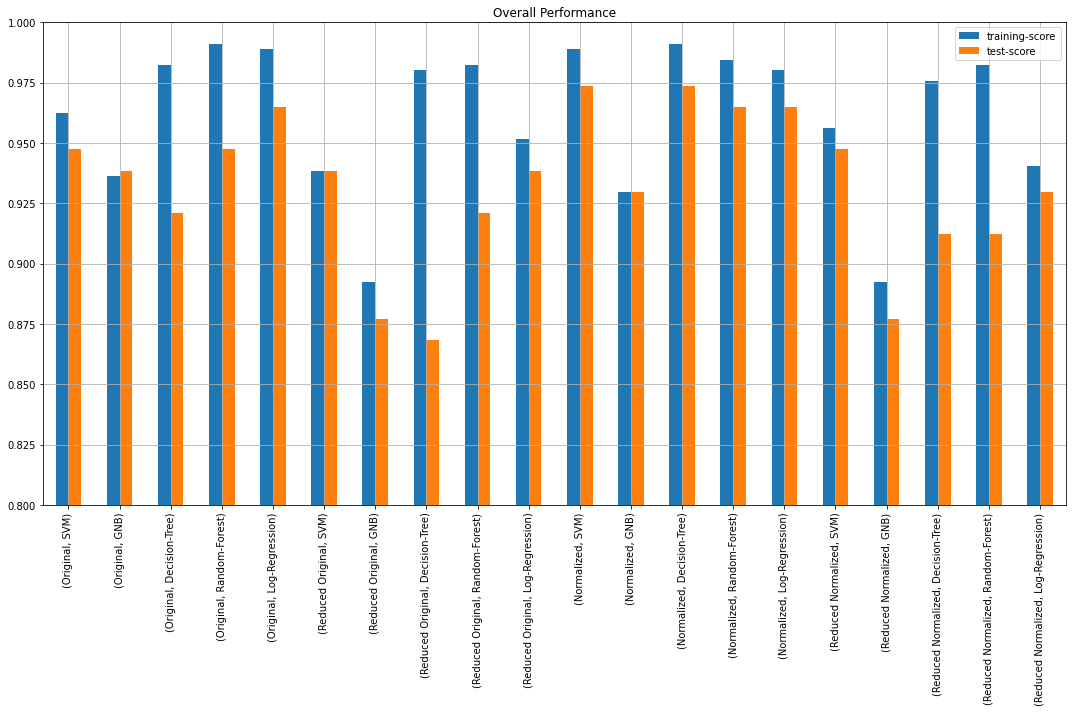

In [0]:
overall_df.plot(kind='bar', figsize=(15,10))
plt.title("Overall Performance")
plt.ylim(0.8,1)
plt.grid()
plt.tight_layout()
plt.show()

As we see in the graph, the overall test results are higher than 90% almost all cases. But we can see the reduced datasets' performances are lower than others.

The reason for that might be in the feature elimination phase. We eliminated 16 features. This number might be high. Because, there may be some valuable feaures. So we can apply different methods other than correlation matrix. Or we can choose to eliminate limited number of features. 

But in the other hand, the results for normalized dataset (full features) is very high. We can predict a breast image is benign or malignant with over 98% accuracy.